## Radium  simulation with 5000000 particles

In [13]:


import pandas as pd
import numpy as np

# Read the dose file into a list of strings
with open('Dose_radium6.txt', 'r') as f:
    data = f.readlines()

# Remove comments and empty lines
lines = [line.strip().split('#')[0] for line in data if line.strip() and not line.startswith('#')]

# Split the lines into fields and create a DataFrame
df = pd.DataFrame([line.split(',') for line in lines], columns=['iX', 'iY', 'iZ', 'dose[Gy]', 'dose^2)', 'entry'])

# Convert columns to numeric type
df = df.apply(pd.to_numeric)

# Display the DataFrame
print(df)

      iX  iY  iZ      dose[Gy]       dose^2)  entry
0      0   0   0  4.806466e-09  4.731048e-19     62
1      0   0   1  5.793819e-09  5.265641e-19     84
2      0   0   2  5.304503e-09  5.070975e-19     73
3      0   0   3  5.802224e-09  5.597816e-19     79
4      0   0   4  5.582981e-09  4.993974e-19     79
...   ..  ..  ..           ...           ...    ...
1326  10  10   6  6.371011e-09  5.630539e-19     90
1327  10  10   7  5.344512e-09  4.924863e-19     73
1328  10  10   8  4.967105e-09  4.813565e-19     68
1329  10  10   9  4.344465e-09  3.898292e-19     59
1330  10  10  10  4.310155e-09  4.106701e-19     58

[1331 rows x 6 columns]


In [14]:
df

,iX,iY,iZ,dose[Gy],dose^2),entry
0,0,0,0,4.806466e-09,4.731048e-19,62
1,0,0,1,5.793819e-09,5.265641e-19,84
2,0,0,2,5.304503e-09,5.070975e-19,73
3,0,0,3,5.802224e-09,5.597816e-19,79
4,0,0,4,5.582981e-09,4.993974e-19,79
...,...,...,...,...,...,...
1326,10,10,6,6.371011e-09,5.630539e-19,90
1327,10,10,7,5.344512e-09,4.924863e-19,73
1328,10,10,8,4.967105e-09,4.813565e-19,68
1329,10,10,9,4.344465e-09,3.898292e-19,59


In [17]:
missing_values = df.isnull().sum()

In [18]:
missing_values

iX          0
iY          0
iZ          0
dose[Gy]    0
dose^2)     0
entry       0
dtype: int64

In [16]:
df.describe()

,iX,iY,iZ,dose[Gy],dose^2),entry
count,1331.000000,1331.000000,1331.000000,1.331000e+03,1.331000e+03,1331.000000
mean,5.000000,5.000000,5.000000,1.425381e-06,1.685741e-15,2846.275733
std,3.163466,3.163466,3.163466,9.004035e-06,1.288737e-14,16632.370484
min,0.000000,0.000000,0.000000,3.059089e-09,2.768697e-19,41.000000
25%,2.000000,2.000000,2.000000,7.819127e-09,7.364066e-19,104.000000
50%,5.000000,5.000000,5.000000,1.083380e-08,1.023679e-18,144.000000
75%,8.000000,8.000000,8.000000,1.798840e-08,1.730039e-18,239.000000
max,10.000000,10.000000,10.000000,1.025488e-04,1.850305e-13,187043.000000


In [5]:
df.columns

Index(['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'], dtype='object')

In [9]:
df.isnull

<bound method DataFrame.isnull of       iX  iY  iZ      dose[Gy]       dose^2)  entry
0      0   0   0  4.806466e-09  4.731048e-19     62
1      0   0   1  5.793819e-09  5.265641e-19     84
2      0   0   2  5.304503e-09  5.070975e-19     73
3      0   0   3  5.802224e-09  5.597816e-19     79
4      0   0   4  5.582981e-09  4.993974e-19     79
...   ..  ..  ..           ...           ...    ...
1326  10  10   6  6.371011e-09  5.630539e-19     90
1327  10  10   7  5.344512e-09  4.924863e-19     73
1328  10  10   8  4.967105e-09  4.813565e-19     68
1329  10  10   9  4.344465e-09  3.898292e-19     59
1330  10  10  10  4.310155e-09  4.106701e-19     58

[1331 rows x 6 columns]>

Total Dose: 2.765113358699722 Gy


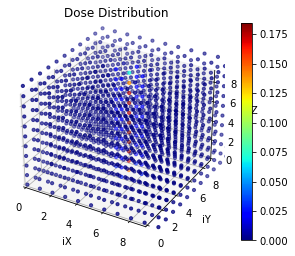

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium_alpha.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'total(value) [Gy]', 'total(val^2)', 'entry'])

# Convert columns to numeric type
df = df.apply(pd.to_numeric)

# extract the relevant columns from the DataFrame
iX = df['iX']
iY = df['iY']
iZ = df['iZ']
dose = df['total(value) [Gy]']

# determine the size of the grid
max_iX = int(np.max(iX))
max_iY = int(np.max(iY))
max_iZ = int(np.max(iZ))

# create a 3D array of dose values
dose_array = np.zeros((max_iX+1, max_iY+1, max_iZ+1))
for i in range(len(dose)):
    dose_array[int(iX[i]), int(iY[i]), int(iZ[i])] = dose[i]

# create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create the x, y, and z coordinates for the plot
x, y, z = np.meshgrid(np.arange(max_iX+1), np.arange(max_iY+1), np.arange(max_iZ+1))

# plot the dose values
scatter = ax.scatter(x, y, z, c=dose_array.flatten(), cmap='jet', s=10)

# add axis labels and title
ax.set_xlabel('iX')
ax.set_ylabel('iY')
ax.set_zlabel('iZ')
ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
ax.set_zlim(0, 9)

ax.set_title('Dose Distribution')
# add colorbar
sm = ScalarMappable(cmap='jet')
sm.set_array(dose_array.flatten())
plt.colorbar(sm)
# Calculate the total dose
total_dose = np.sum(dose_array)

# Print the result
print("Total Dose: {} Gy".format(total_dose))

# show the plot
plt.show()


Total Dose: 2718.942258451331 Gy


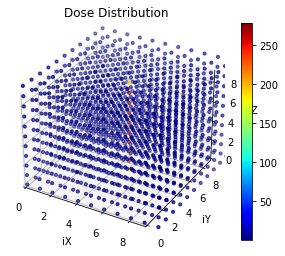

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium3.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'total(value) [Gy]', 'total(val^2)', 'entry'])

# Convert columns to numeric type
df = df.apply(pd.to_numeric)

# extract the relevant columns from the DataFrame
iX = df['iX']
iY = df['iY']
iZ = df['iZ']
dose = df['total(value) [Gy]']

# determine the size of the grid
max_iX = int(np.max(iX))
max_iY = int(np.max(iY))
max_iZ = int(np.max(iZ))

# create a 3D array of dose values
dose_array = np.zeros((max_iX+1, max_iY+1, max_iZ+1))
for i in range(len(dose)):
    dose_array[int(iX[i]), int(iY[i]), int(iZ[i])] = dose[i]

# create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create the x, y, and z coordinates for the plot
x, y, z = np.meshgrid(np.arange(max_iX+1), np.arange(max_iY+1), np.arange(max_iZ+1))

# plot the dose values
scatter = ax.scatter(x, y, z, c=dose_array.flatten(), cmap='jet', s=10)

# add axis labels and title
ax.set_xlabel('iX')
ax.set_ylabel('iY')
ax.set_zlabel('iZ')
ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
ax.set_zlim(0, 9)

ax.set_title('Dose Distribution')
# add colorbar
sm = ScalarMappable(cmap='jet')
sm.set_array(dose_array.flatten())
plt.colorbar(sm)
# Calculate the total dose
total_dose = np.sum(dose_array)

# Print the result
print("Total Dose: {} Gy".format(total_dose))

# show the plot
plt.show()


Total Dose: 277.94048780567863 Gy


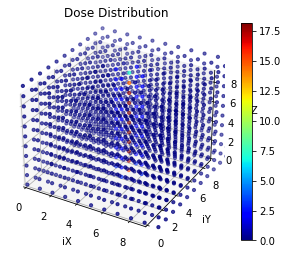

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium_betaMinus.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'total(value) [Gy]', 'total(val^2)', 'entry'])

# Convert columns to numeric type
df = df.apply(pd.to_numeric)

# extract the relevant columns from the DataFrame
iX = df['iX']
iY = df['iY']
iZ = df['iZ']
dose = df['total(value) [Gy]']

# determine the size of the grid
max_iX = int(np.max(iX))
max_iY = int(np.max(iY))
max_iZ = int(np.max(iZ))

# create a 3D array of dose values
dose_array = np.zeros((max_iX+1, max_iY+1, max_iZ+1))
for i in range(len(dose)):
    dose_array[int(iX[i]), int(iY[i]), int(iZ[i])] = dose[i]

# create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create the x, y, and z coordinates for the plot
x, y, z = np.meshgrid(np.arange(max_iX+1), np.arange(max_iY+1), np.arange(max_iZ+1))

# plot the dose values
scatter = ax.scatter(x, y, z, c=dose_array.flatten(), cmap='jet', s=10)

# add axis labels and title
ax.set_xlabel('iX')
ax.set_ylabel('iY')
ax.set_zlabel('iZ')
ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
ax.set_zlim(0, 9)

ax.set_title('Dose Distribution')
# add colorbar
sm = ScalarMappable(cmap='jet')
sm.set_array(dose_array.flatten())
plt.colorbar(sm)
# Calculate the total dose
total_dose = np.sum(dose_array)

# Print the result
print("Total Dose: {} Gy".format(total_dose))

# show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium_betaMinus.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'total(value) [Gy]', 'total(val^2)', 'entry'])

# Convert columns to numeric type
df = df.apply(pd.to_numeric)

# extract the relevant columns from the DataFrame
iX = df['iX']
iY = df['iY']
iZ = df['iZ']
dose = df['total(value) [Gy]']

# determine the size of the grid
max_iX = int(np.max(iX))
max_iY = int(np.max(iY))
max_iZ = int(np.max(iZ))

# create a 3D array of dose values
dose_array = np.zeros((max_iX+1, max_iY+1, max_iZ+1))
for i in range(len(dose)):
    dose_array[int(iX[i]), int(iY[i]), int(iZ[i])] = dose[i]

# create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create the x, y, and z coordinates for the plot
x, y, z = np.meshgrid(np.arange(max_iX+1), np.arange(max_iY+1), np.arange(max_iZ+1))

# plot the dose values
scatter = ax.scatter(x, y, z, c=dose_array.flatten(), cmap='jet', s=10)

# add axis labels and title
ax.set_xlabel('iX')
ax.set_ylabel('iY')
ax.set_zlabel('iZ')
ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
ax.set_zlim(0, 9)

ax.set_title('Dose Distribution')
# add colorbar
sm = ScalarMappable(cmap='jet')
sm.set_array(dose_array.flatten())
plt.colorbar(sm)
# Calculate the total dose
total_dose = np.sum(dose_array)

# Print the result
print("Total Dose: {} Gy".format(total_dose))

# show the plot
plt.show()


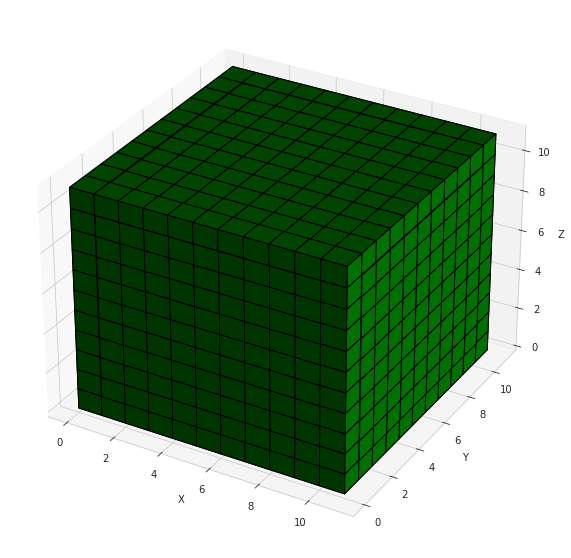

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
data_matrix = np.loadtxt("Dose_iodine.txt", delimiter=",", skiprows=1)

# Define voxel dimensions and ROI radius
WidthOfXcoxel = WidthOfYcoxel = WidthOfZcoxel = 1.0 # cm
X_LowLimit = Y_LowLimit = Z_LowLimit = 0.0 # cm
ROI_Radius = 5.0 # cm

# Compute coordination matrix
Coordination_matrix = np.zeros((data_matrix.shape[0], 4))
Coordination_matrix[:, 0] = data_matrix[:, 0] * WidthOfXcoxel + X_LowLimit + (WidthOfXcoxel / 2)
Coordination_matrix[:, 1] = data_matrix[:, 1] * WidthOfYcoxel + Y_LowLimit + (WidthOfYcoxel / 2)
Coordination_matrix[:, 2] = data_matrix[:, 2] * WidthOfZcoxel + Z_LowLimit + (WidthOfZcoxel / 2)
Coordination_matrix[:, 3] = data_matrix[:, 3]

# Compute cumulative dose and dose outside ROI
total_dose = np.sum(Coordination_matrix[:, 3])
dose_of_outsideROI = 0.0
for i in range(data_matrix.shape[0]):
    if (Coordination_matrix[i, 0]**2 + Coordination_matrix[i, 1]**2 + Coordination_matrix[i, 2]**2) > ROI_Radius**2:
        dose_of_outsideROI += Coordination_matrix[i, 3]

percent_of_outside_dose = dose_of_outsideROI * 100.0 / total_dose

# Remove voxels with zero dose
Coordination_matrix_WithoutZeroDose = Coordination_matrix[Coordination_matrix[:, 3] != 0, :]

# Sum all the dose maps
total_dose_map = np.sum(Coordination_matrix[:, 3])

# Reshape the dose map to 3D
dose_map = Coordination_matrix[:, 3].reshape((int(data_matrix[:, 0].max()) + 1,
                                               int(data_matrix[:, 1].max()) + 1,
                                               int(data_matrix[:, 2].max()) + 1))

# Plot the dose map
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
X, Y, Z = np.meshgrid(np.arange(0, dose_map.shape[1]+1),
                      np.arange(0, dose_map.shape[0]+1),
                      np.arange(0, dose_map.shape[2]+1))
#ax.voxels(X, Y, Z, dose_map, edgecolor='k')
#ax.title('Disposition of our voxels in each axis')
ax.voxels(X, Y, Z, dose_map, facecolors='green', edgecolor='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
np.savetxt("Dose_Deposit.txt", Coordination_matrix, delimiter=",", header="X,Y,Z,Dose")



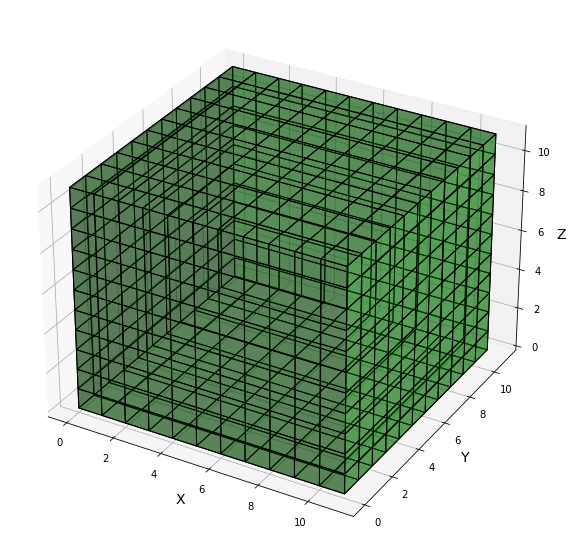

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
data_matrix = np.loadtxt("Dose_radium3.txt", delimiter=",", skiprows=1)

# Define voxel dimensions and ROI radius
WidthOfXvoxel = WidthOfYvoxel = WidthOfZvoxel = 1.0  # cm
X_LowLimit = Y_LowLimit = Z_LowLimit = 0.0  # cm
ROI_Radius = 5.0  # cm

# Compute coordination matrix
Coordination_matrix = np.zeros((data_matrix.shape[0], 4))
Coordination_matrix[:, 0] = data_matrix[:, 0] * WidthOfXvoxel + X_LowLimit + (WidthOfXvoxel / 2)
Coordination_matrix[:, 1] = data_matrix[:, 1] * WidthOfYvoxel + Y_LowLimit + (WidthOfYvoxel / 2)
Coordination_matrix[:, 2] = data_matrix[:, 2] * WidthOfZvoxel + Z_LowLimit + (WidthOfZvoxel / 2)
Coordination_matrix[:, 3] = data_matrix[:, 3]

# Compute cumulative dose and dose outside ROI
total_dose = np.sum(Coordination_matrix[:, 3])
dose_of_outsideROI = 0.0
for i in range(data_matrix.shape[0]):
    if (Coordination_matrix[i, 0] ** 2 + Coordination_matrix[i, 1] ** 2 + Coordination_matrix[i, 2] ** 2) > ROI_Radius ** 2:
        dose_of_outsideROI += Coordination_matrix[i, 3]

percent_of_outside_dose = dose_of_outsideROI * 100.0 / total_dose

# Remove voxels with zero dose
Coordination_matrix_WithoutZeroDose = Coordination_matrix[Coordination_matrix[:, 3] != 0, :]

# Sum all the dose maps
total_dose_map = np.sum(Coordination_matrix[:, 3])

# Reshape the dose map to 3D
dose_map = Coordination_matrix[:, 3].reshape((int(data_matrix[:, 0].max()) + 1,
                                              int(data_matrix[:, 1].max()) + 1,
                                              int(data_matrix[:, 2].max()) + 1))

# Plot the dose map
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
X, Y, Z = np.meshgrid(np.arange(0, dose_map.shape[1] + 1),
                      np.arange(0, dose_map.shape[0] + 1),
                      np.arange(0, dose_map.shape[2] + 1))
ax.voxels(X, Y, Z, dose_map, facecolors='green', edgecolor='k', alpha=0.4)  # Set alpha for transparency
ax.set_xlabel('X',fontsize= 14)
ax.set_ylabel('Y', fontsize= 14)
ax.set_zlabel('Z', fontsize= 14)
plt.savefig('dose2.png', facecolor='white')
plt.show()




Total Dose: 2718.9416965117566 Gy


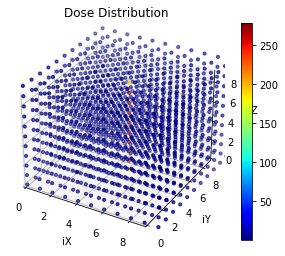

In [4]:
Dose_radium_alpha.txt

Total Dose: 0.0018971962947790326 Gy


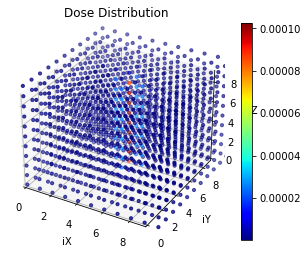

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium_gamma.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'total(value) [Gy]', 'total(val^2)', 'entry'])

# Convert columns to numeric type
df = df.apply(pd.to_numeric)

# extract the relevant columns from the DataFrame
iX = df['iX']
iY = df['iY']
iZ = df['iZ']
dose = df['total(value) [Gy]']

# determine the size of the grid
max_iX = int(np.max(iX))
max_iY = int(np.max(iY))
max_iZ = int(np.max(iZ))

# create a 3D array of dose values
dose_array = np.zeros((max_iX+1, max_iY+1, max_iZ+1))
for i in range(len(dose)):
    dose_array[int(iX[i]), int(iY[i]), int(iZ[i])] = dose[i]

# create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create the x, y, and z coordinates for the plot
x, y, z = np.meshgrid(np.arange(max_iX+1), np.arange(max_iY+1), np.arange(max_iZ+1))

# plot the dose values
scatter = ax.scatter(x, y, z, c=dose_array.flatten(), cmap='jet', s=10)

# add axis labels and title
ax.set_xlabel('iX')
ax.set_ylabel('iY')
ax.set_zlabel('iZ')
ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
ax.set_zlim(0, 9)

ax.set_title('Dose Distribution')
# add colorbar
sm = ScalarMappable(cmap='jet')
sm.set_array(dose_array.flatten())
plt.colorbar(sm)
# Calculate the total dose
total_dose = np.sum(dose_array)

# Print the result
print("Total Dose: {} Gy".format(total_dose))

# show the plot
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

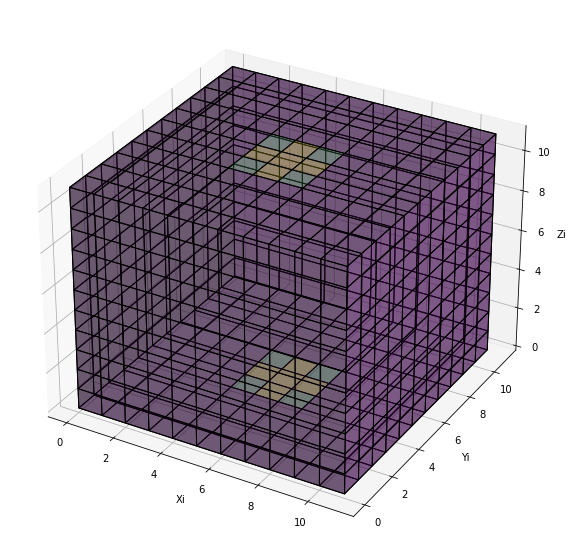

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
data_matrix = np.loadtxt("Dose_radium3111.txt", delimiter=",", skiprows=1)

# Define voxel dimensions and ROI radius
WidthOfXvoxel = WidthOfYvoxel = WidthOfZvoxel = 0.21  # cm
X_LowLimit = Y_LowLimit = Z_LowLimit = 0.0  # cm
ROI_Radius = 5.0  # cm

# Compute coordination matrix
Coordination_matrix = np.zeros((data_matrix.shape[0], 4))
Coordination_matrix[:, 0] = data_matrix[:, 0] * WidthOfXvoxel + X_LowLimit + (WidthOfXvoxel / 2)
Coordination_matrix[:, 1] = data_matrix[:, 1] * WidthOfYvoxel + Y_LowLimit + (WidthOfYvoxel / 2)
Coordination_matrix[:, 2] = data_matrix[:, 2] * WidthOfZvoxel + Z_LowLimit + (WidthOfZvoxel / 2)
Coordination_matrix[:, 3] = data_matrix[:, 3]

# Compute cumulative dose and dose outside ROI
total_dose = np.sum(Coordination_matrix[:, 3])
dose_of_outsideROI = 0.0
for i in range(data_matrix.shape[0]):
    if (Coordination_matrix[i, 0] ** 2 + Coordination_matrix[i, 1] ** 2 + Coordination_matrix[i, 2] ** 2) > ROI_Radius ** 2:
        dose_of_outsideROI += Coordination_matrix[i, 3]

percent_of_outside_dose = dose_of_outsideROI * 100.0 / total_dose

# Remove voxels with zero dose
Coordination_matrix_WithoutZeroDose = Coordination_matrix[Coordination_matrix[:, 3] != 0, :]

# Reshape the dose map to 3D
dose_map = Coordination_matrix[:, 3].reshape(
    (int(data_matrix[:, 0].max()) + 1, int(data_matrix[:, 1].max()) + 1, int(data_matrix[:, 2].max()) + 1)
)

# Plot the dose map
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
X, Y, Z = np.meshgrid(
    np.arange(0, dose_map.shape[1] + 1),
    np.arange(0, dose_map.shape[0] + 1),
    np.arange(0, dose_map.shape[2] + 1),
)
colors = np.log10(dose_map)  # Use logarithmic scale for colors
voxels = ax.voxels(
    X,
    Y,
    Z,
    dose_map,
    facecolors=plt.cm.viridis(colors),
    edgecolor="k",
    alpha=0.4,
)  # Set alpha for transparency
ax.set_xlabel("Xi")
ax.set_ylabel("Yi")
ax.set_zlabel("Zi")

# Add color bar with positive values only
positive_values = dose_map[dose_map > 0]  # Extract positive values
min_value = np.min(positive_values)  # Find the minimum positive value
max_value = np.max(positive_values)  # Find the maximum positive value
norm = plt.Normalize(min_value, max_value)
# add colorbar
plt.colorbar( label="Dose [Gy]", orientation="vertical")
colors = np.log10(dose_map)

# Save and show the figure
plt.savefig("dose1.png", facecolor="white")
plt.show()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_alpha.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'total(value) [Gy]', 'total(val^2)', 'entry'])

# Convert columns to numeric type
df = df.apply(pd.to_numeric)

# extract the relevant columns from the DataFrame
iX = df['iX']
iY = df['iY']
iZ = df['iZ']
dose = df['total(value) [Gy]']

# determine the size of the grid
max_iX = int(np.max(iX))
max_iY = int(np.max(iY))
max_iZ = int(np.max(iZ))

# create a 3D array of dose values
dose_array = np.zeros((max_iX+1, max_iY+1, max_iZ+1))
for i in range(len(dose)):
    dose_array[int(iX[i]), int(iY[i]), int(iZ[i])] = dose[i]

# create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create the x, y, and z coordinates for the plot
x, y, z = np.meshgrid(np.arange(max_iX+1), np.arange(max_iY+1), np.arange(max_iZ+1))

# plot the dose values
scatter = ax.scatter(x, y, z, c=dose_array.flatten(), cmap='jet', s=10)

# add axis labels and title
ax.set_xlabel('iX')
ax.set_ylabel('iY')
ax.set_zlabel('iZ')
ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
ax.set_zlim(0, 9)

ax.set_title('Dose Distribution')
# add colorbar
sm = ScalarMappable(cmap='jet')
sm.set_array(dose_array.flatten())
plt.colorbar(sm)
# Calculate the total dose
total_dose = np.sum(dose_array)

# Print the result
print("Total Dose: {} Gy".format(total_dose))

# show the plot
plt.show()


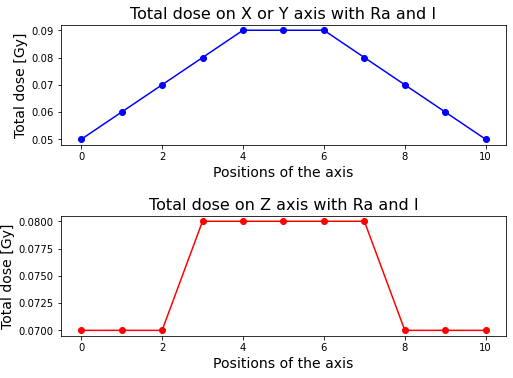

In [2]:
import matplotlib.pyplot as plt

# Data
positions = list(range(11))
total_dose_x = [0.05, 0.06, 0.07, 0.08, 0.09, 0.09, 0.09, 0.08, 0.07, 0.06, 0.05]
total_dose_z = [0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.07, 0.07, 0.07]

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
fig.tight_layout(pad=5)

# First subplot
axs[0].plot(positions, total_dose_x, marker='o', linestyle='-', color='blue')
axs[0].set_xlabel('Positions of the axis',fontsize =14)
axs[0].set_ylabel('Total dose [Gy]', fontsize =14)
axs[0].set_title('Total dose on X or Y axis with Ra and I',fontsize =16)

# Second subplot
axs[1].plot(positions, total_dose_z, marker='o', linestyle='-', color='red')
axs[1].set_xlabel('Positions of the axis', fontsize =14)
axs[1].set_ylabel('Total dose [Gy]', fontsize =14)
axs[1].set_title('Total dose on Z axis with Ra and I', fontsize =16)
plt.savefig('representation_doseRaI.png', facecolor='white')
plt.show()


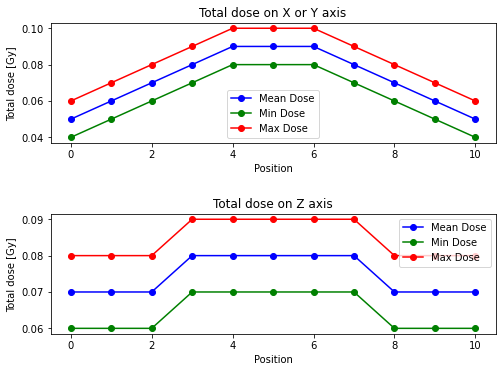

In [12]:
import matplotlib.pyplot as plt

# Data
positions = list(range(11))
mean_dose_x = [0.05, 0.06, 0.07, 0.08, 0.09, 0.09, 0.09, 0.08, 0.07, 0.06, 0.05]
min_dose_x = [0.04, 0.05, 0.06, 0.07, 0.08, 0.08, 0.08, 0.07, 0.06, 0.05, 0.04]
max_dose_x = [0.06, 0.07, 0.08, 0.09, 0.10, 0.10, 0.10, 0.09, 0.08, 0.07, 0.06]

mean_dose_z = [0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.07, 0.07, 0.07]
min_dose_z = [0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.06, 0.06, 0.06]
max_dose_z = [0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.08, 0.08, 0.08]

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
fig.tight_layout(pad=5)

# First subplot
axs[0].plot(positions, mean_dose_x, marker='o', linestyle='-', color='blue', label='Mean Dose')
axs[0].plot(positions, min_dose_x, marker='o', linestyle='-', color='green', label='Min Dose')
axs[0].plot(positions, max_dose_x, marker='o', linestyle='-', color='red', label='Max Dose')
axs[0].set_xlabel('Position')
axs[0].set_ylabel('Total dose [Gy]')
axs[0].set_title('Total dose on X or Y axis')
axs[0].legend()

# Second subplot
axs[1].plot(positions, mean_dose_z, marker='o', linestyle='-', color='blue', label='Mean Dose')
axs[1].plot(positions, min_dose_z, marker='o', linestyle='-', color='green', label='Min Dose')
axs[1].plot(positions, max_dose_z, marker='o', linestyle='-', color='red', label='Max Dose')
axs[1].set_xlabel('Position')
axs[1].set_ylabel('Total dose [Gy]')
axs[1].set_title('Total dose on Z axis')
axs[1].legend()

plt.show()


Total Dose: 11643.610864674152 Gy


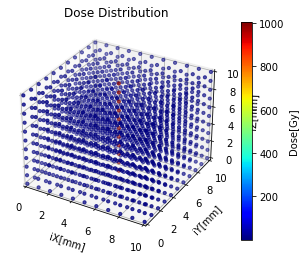

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'total(value) [Gy]', 'total(val^2)', 'entry'])

# Convert columns to numeric type
df = df.apply(pd.to_numeric)

# extract the relevant columns from the DataFrame
iX = df['iX']
iY = df['iY']
iZ = df['iZ']
dose = df['total(value) [Gy]']

# determine the size of the grid
max_iX = int(np.max(iX))
max_iY = int(np.max(iY))
max_iZ = int(np.max(iZ))

# create a 3D array of dose values
dose_array = np.zeros((max_iX+1, max_iY+1, max_iZ+1))
for i in range(len(dose)):
    dose_array[int(iX[i]), int(iY[i]), int(iZ[i])] = dose[i]

# create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create the x, y, and z coordinates for the plot
x, y, z = np.meshgrid(np.arange(max_iX+1), np.arange(max_iY+1), np.arange(max_iZ+1))

# plot the dose values
scatter = ax.scatter(x, y, z, c=dose_array.flatten(), cmap='jet', s=10)

# add axis labels and title
ax.set_xlabel('iX[mm]')
ax.set_ylabel('iY[mm]')
ax.set_zlabel('iZ[mm]')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

ax.set_title('Dose Distribution')

# Calculate the total dose
total_dose = np.sum(dose_array)
# add colorbar
sm = ScalarMappable(cmap='jet')
sm.set_array(dose_array.flatten())
#plt.colorbar(sm)
cbar = plt.colorbar(sm)
cbar.set_label('Dose[Gy]')
# Print the result
print("Total Dose: {} Gy".format(total_dose))
plt.savefig("dose_R.png", facecolor='white')
# show the plot
plt.show()


Total Dose: 0.8167168534152657 Gy


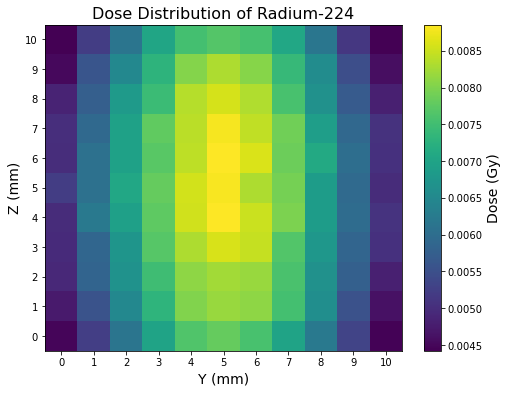

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the X and Z coordinates
x, z = np.meshgrid(df['iY'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Y (mm)', fontsize =14)  # Set the X-axis label
ax.set_ylabel('Z (mm)', fontsize =14)  # Set the Z-axis label
ax.set_title('Dose Distribution of Radium-224', fontsize =16)

im = ax.pcolormesh(x, z, dose_array, cmap='viridis')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Dose (Gy)', fontsize =14)  # Set the colorbar label

# Set the Z-axis labels
z_labels = df['iZ'].unique().astype(str)
ax.set_yticks(range(len(z_labels)))
ax.set_yticklabels(z_labels)

# Set the Y-axis labels
y_labels = df['iY'].unique().astype(str)
ax.set_xticks(range(len(y_labels)))
ax.set_xticklabels(y_labels)

# Calculate the total dose
total_dose = np.sum(dose_array)

# Print the result
print("Total Dose: {} Gy".format(total_dose))

# Save the figure with a white background
plt.savefig('dose_zy_Ra.png', facecolor='white')


# Display the plot
plt.show()


Dose at point (0, 0): 0.0044888920672837 Gy
Dose at point (0, 1): 0.0092190856523174 Gy
Dose at point (0, 2): 0.0141358380498785 Gy
Dose at point (0, 3): 0.0190814564651868 Gy
Dose at point (0, 4): 0.0240414203591217 Gy
Dose at point (0, 5): 0.0292460726193691 Gy
Dose at point (0, 6): 0.0342299025585976 Gy
Dose at point (0, 7): 0.0392392385429329 Gy
Dose at point (0, 8): 0.044087535848479305 Gy
Dose at point (0, 9): 0.04860859600821651 Gy
Dose at point (0, 10): 0.05302992307931031 Gy
Dose at point (1, 0): 0.0052227117878357 Gy
Dose at point (1, 1): 0.0107776922643413 Gy
Dose at point (1, 2): 0.0166035687607048 Gy
Dose at point (1, 3): 0.0224688907535564 Gy
Dose at point (1, 4): 0.0286863706250148 Gy
Dose at point (1, 5): 0.0347524242766245 Gy
Dose at point (1, 6): 0.040805248880132795 Gy
Dose at point (1, 7): 0.046719653253112406 Gy
Dose at point (1, 8): 0.05247152368997251 Gy
Dose at point (1, 9): 0.05805945141193241 Gy
Dose at point (1, 10): 0.06326912979237032 Gy
Dose at point (2, 0

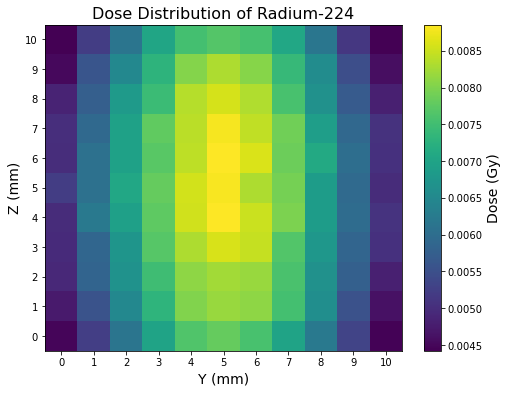

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates
y, z = np.meshgrid(df['iY'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Y (mm)', fontsize=14)  # Set the X-axis label
ax.set_ylabel('Z (mm)', fontsize=14)  # Set the Z-axis label
ax.set_title('Dose Distribution of Radium-224', fontsize=16)

im = ax.pcolormesh(y, z, dose_array, cmap='viridis')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Dose (Gy)', fontsize=14)  # Set the colorbar label

# Set the Z-axis labels
z_labels = df['iZ'].unique().astype(str)
ax.set_yticks(range(len(z_labels)))
ax.set_yticklabels(z_labels)

# Set the Y-axis labels
y_labels = df['iY'].unique().astype(str)
ax.set_xticks(range(len(y_labels)))
ax.set_xticklabels(y_labels)

# Calculate the sum of dose at each point
for i in range(len(y_labels)):
    for j in range(len(z_labels)):
        dose_sum = np.nansum(dose_array[i, :j+1])  # Sum of dose at each point (x, z)
        print("Dose at point ({}, {}): {} Gy".format(y_labels[i], z_labels[j], dose_sum))

# Calculate the total dose
total_dose = np.nansum(dose_array)

# Print the total dose
print("Total Dose: {} Gy".format(total_dose))

# Save the figure with a white background
plt.savefig('dose_zy_Ra.png', facecolor='white')

# Display the plot
plt.show()


In [23]:
dose_values = [0.0078061857232391, 0.0159719571652549, 0.024209148172716, 0.0327963790890058, 0.0416515094163348,
     0.0504656587563337, 0.0593154928446114, 0.0681034267032214, 0.0766722917201275, 0.08498590966913741,
     0.09265073285923262]

# Calculate the sum of doses
total_sum = sum(dose_values)

# Print the sum and value at point (0, 0)
print("Sum of doses: {} Gy".format(total_sum))



Sum of doses: 0.5546286921192147 Gy


In [24]:
total_sum = 0.0078061857232391 + 0.0159719571652549 + 0.024209148172716 + 0.0327963790890058 + 0.0416515094163348 + 0.0504656587563337 + 0.0593154928446114 + 0.0681034267032214 + 0.0766722917201275 + 0.08498590966913741 + 0.09265073285923262

print("Total sum:", total_sum)


Total sum: 0.5546286921192147


Dose at voxel (0, 0): 0.0044888920672837 Gy
Dose at voxel (0, 1): 0.0047301935850337 Gy
Dose at voxel (0, 2): 0.0049167523975611 Gy
Dose at voxel (0, 3): 0.0049456184153083 Gy
Dose at voxel (0, 4): 0.0049599638939349 Gy
Dose at voxel (0, 5): 0.0052046522602474 Gy
Dose at voxel (0, 6): 0.0049838299392285 Gy
Dose at voxel (0, 7): 0.0050093359843353 Gy
Dose at voxel (0, 8): 0.0048482973055464 Gy
Dose at voxel (0, 9): 0.0045210601597372 Gy
Dose at voxel (0, 10): 0.0044213270710938 Gy
Dose at voxel (1, 0): 0.005182510996486 Gy
Dose at voxel (1, 1): 0.0055755950533822 Gy
Dose at voxel (1, 2): 0.0057780378800881 Gy
Dose at voxel (1, 3): 0.0058673660884662 Gy
Dose at voxel (1, 4): 0.0060156949671534 Gy
Dose at voxel (1, 5): 0.005972865659904 Gy
Dose at voxel (1, 6): 0.0059308738355709 Gy
Dose at voxel (1, 7): 0.0057740125435396 Gy
Dose at voxel (1, 8): 0.00563025727533 Gy
Dose at voxel (1, 9): 0.0054776684824793 Gy
Dose at voxel (1, 10): 0.0051280537737319 Gy
Dose at voxel (2, 0): 0.0060498193

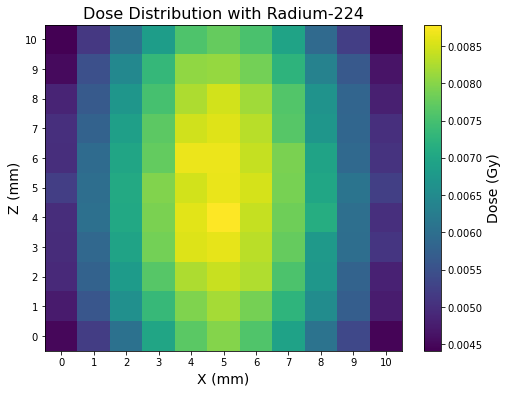

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iX', columns='iZ', aggfunc='first').values

# Create a meshgrid for the X and Z coordinates
x, z = np.meshgrid(df['iX'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('X (mm)', fontsize=14)  # Set the X-axis label
ax.set_ylabel('Z (mm)', fontsize=14)  # Set the Z-axis label
ax.set_title('Dose Distribution with Radium-224', fontsize=16)

im = ax.pcolormesh(x, z, dose_array, cmap='viridis')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Dose (Gy)', fontsize=14)  # Set the colorbar label

# Set the Z-axis labels
z_labels = df['iZ'].unique().astype(str)
ax.set_yticks(range(len(z_labels)))
ax.set_yticklabels(z_labels)

# Set the X-axis labels
x_labels = df['iX'].unique().astype(str)
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)

# Calculate the sum of dose in each voxel
voxel_dose_sum = np.nansum(dose_array)

# Print the result for each voxel
for i in range(len(x_labels)):
    for j in range(len(z_labels)):
        dose = dose_array[i, j]
        print("Dose at voxel ({}, {}): {} Gy".format(x_labels[i], z_labels[j], dose))

# Print the total dose
print("Total Dose: {} Gy".format(voxel_dose_sum))

# Save the figure with a white background
plt.savefig('dose_zX.png', facecolor='white')

# Display the plot
plt.show()


Total Dose: 0.8154521340234956 Gy


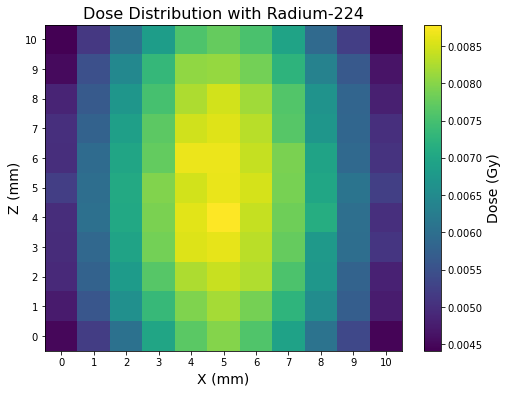

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iX', columns='iZ', aggfunc='first').values

# Create a meshgrid for the X and Z coordinates
x, z = np.meshgrid(df['iX'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('X (mm)', fontsize =14)  # Set the X-axis label
ax.set_ylabel('Z (mm)', fontsize =14)  # Set the Z-axis label
ax.set_title('Dose Distribution with Radium-224', fontsize =16)

im = ax.pcolormesh(x, z, dose_array, cmap='viridis')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Dose (Gy)', fontsize= 14)  # Set the colorbar label

# Set the Z-axis labels
z_labels = df['iZ'].unique().astype(str)
ax.set_yticks(range(len(z_labels)))
ax.set_yticklabels(z_labels)

# Set the Y-axis labels
x_labels = df['iX'].unique().astype(str)
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)

# Calculate the total dose
total_dose = np.sum(dose_array)

# Print the result
print("Total Dose: {} Gy".format(total_dose))

# Save the figure with a white background
plt.savefig('dose_zX.png', facecolor='white')


# Display the plot
plt.show()


Total Dose: 0.0004403112526059134 Gy
Dose at point (0, 0): 2.421011517676202e-06 Gy
Dose at point (0, 1): 2.196349210306234e-06 Gy
Dose at point (0, 2): 2.878946630026705e-06 Gy
Dose at point (0, 3): 2.900389458096136e-06 Gy
Dose at point (0, 4): 3.178387728813942e-06 Gy
Dose at point (0, 5): 3.710292512521517e-06 Gy
Dose at point (0, 6): 2.625941843422781e-06 Gy
Dose at point (0, 7): 2.378168067153221e-06 Gy
Dose at point (0, 8): 2.50549617920128e-06 Gy
Dose at point (0, 9): 1.734223353100934e-06 Gy
Dose at point (0, 10): 1.802035578187632e-06 Gy
Dose at point (1, 0): 2.339910570302444e-06 Gy
Dose at point (1, 1): 3.395843564264055e-06 Gy
Dose at point (1, 2): 2.454838988342089e-06 Gy
Dose at point (1, 3): 3.902856866744402e-06 Gy
Dose at point (1, 4): 3.402812934319937e-06 Gy
Dose at point (1, 5): 2.956906683932759e-06 Gy
Dose at point (1, 6): 3.968810761589516e-06 Gy
Dose at point (1, 7): 3.538358532200996e-06 Gy
Dose at point (1, 8): 3.403691264319907e-06 Gy
Dose at point (1, 9): 3

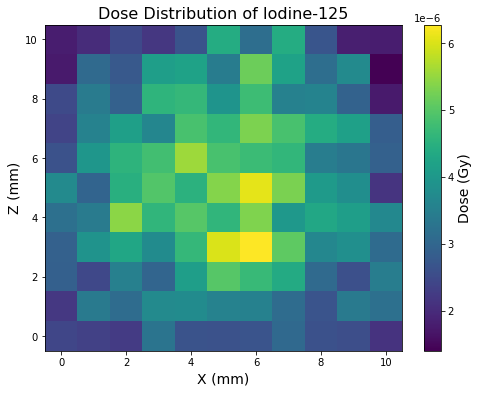

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_iodine1.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iX', columns='iZ', aggfunc='first').values

# Create a meshgrid for the X and Z coordinates
x, z = np.meshgrid(df['iX'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('X (mm)',fontsize =14)  # Set the X-axis label
ax.set_ylabel('Z (mm)',fontsize =14)  # Set the Z-axis label
ax.set_title('Dose Distribution of Iodine-125',fontsize =16)

im = ax.pcolormesh(x, z, dose_array, cmap='viridis')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Dose (Gy)',fontsize =14)  # Set the colorbar label

# Calculate the total dose
total_dose = np.sum(dose_array)

# Print the result
print("Total Dose: {} Gy".format(total_dose))
# Calculate the total dose at each point
for i in range(len(y_labels)):
    for j in range(len(z_labels)):
        dose = dose_array[i, j]
        print("Dose at point ({}, {}): {} Gy".format(y_labels[i], z_labels[j], dose))

# Save the figure with a white background

plt.savefig('dose_zx.png', facecolor='white')

# Display the plot
plt.show()


Total Dose: 0.00045696946064007697 Gy


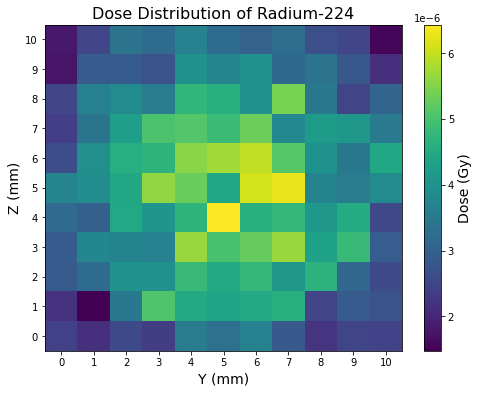

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_iodine1.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the X and Z coordinates
x, z = np.meshgrid(df['iY'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Y (mm)', fontsize =14)  # Set the X-axis label
ax.set_ylabel('Z (mm)', fontsize =14)  # Set the Z-axis label
ax.set_title('Dose Distribution of Radium-224', fontsize =16)

im = ax.pcolormesh(x, z, dose_array, cmap='viridis')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Dose (Gy)', fontsize =14)  # Set the colorbar label

# Set the Z-axis labels
z_labels = df['iZ'].unique().astype(str)
ax.set_yticks(range(len(z_labels)))
ax.set_yticklabels(z_labels)

# Set the Y-axis labels
y_labels = df['iY'].unique().astype(str)
ax.set_xticks(range(len(y_labels)))
ax.set_xticklabels(y_labels)

# Calculate the total dose
total_dose = np.sum(dose_array)

# Print the result
print("Total Dose: {} Gy".format(total_dose))

# Save the figure with a white background
plt.savefig('dose_zy_Ra.png', facecolor='white')


# Display the plot
plt.show()


Dose at point (0, 0): 2.421011517676202e-06 Gy
Dose at point (0, 1): 2.196349210306234e-06 Gy
Dose at point (0, 2): 2.878946630026705e-06 Gy
Dose at point (0, 3): 2.900389458096136e-06 Gy
Dose at point (0, 4): 3.178387728813942e-06 Gy
Dose at point (0, 5): 3.710292512521517e-06 Gy
Dose at point (0, 6): 2.625941843422781e-06 Gy
Dose at point (0, 7): 2.378168067153221e-06 Gy
Dose at point (0, 8): 2.50549617920128e-06 Gy
Dose at point (0, 9): 1.734223353100934e-06 Gy
Dose at point (0, 10): 1.802035578187632e-06 Gy
Dose at point (1, 0): 2.157776363157628e-06 Gy
Dose at point (1, 1): 1.478139552250807e-06 Gy
Dose at point (1, 2): 3.199315410660525e-06 Gy
Dose at point (1, 3): 3.776550089167869e-06 Gy
Dose at point (1, 4): 2.975532100060963e-06 Gy
Dose at point (1, 5): 3.887730180484149e-06 Gy
Dose at point (1, 6): 3.950894758252066e-06 Gy
Dose at point (1, 7): 3.385357651554264e-06 Gy
Dose at point (1, 8): 3.618927062973855e-06 Gy
Dose at point (1, 9): 2.8937443516695e-06 Gy
Dose at point (

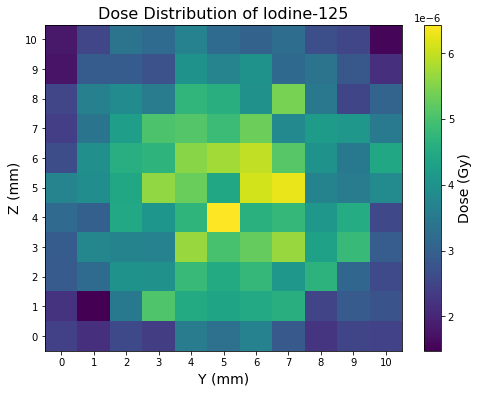

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_iodine1.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates
y, z = np.meshgrid(df['iY'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Y (mm)', fontsize=14)  # Set the Y-axis label
ax.set_ylabel('Z (mm)', fontsize=14)  # Set the Z-axis label
ax.set_title('Dose Distribution of Iodine-125', fontsize=16)

im = ax.pcolormesh(y, z, dose_array, cmap='viridis')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Dose (Gy)', fontsize=14)  # Set the colorbar label

# Set the Z-axis labels
z_labels = df['iZ'].unique().astype(str)
ax.set_yticks(range(len(z_labels)))
ax.set_yticklabels(z_labels)

# Set the Y-axis labels
y_labels = df['iY'].unique().astype(str)
ax.set_xticks(range(len(y_labels)))
ax.set_xticklabels(y_labels)

# Calculate the total dose at each point
for i in range(len(y_labels)):
    for j in range(len(z_labels)):
        dose = dose_array[i, j]
        print("Dose at point ({}, {}): {} Gy".format(y_labels[i], z_labels[j], dose))

# Save the figure with a white background
plt.savefig('dose_zy_I.png', facecolor='white')

# Display the plot
plt.show()


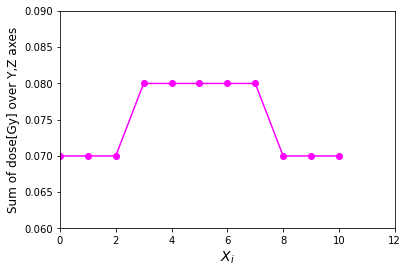

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dose values
dose_values = [0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.07, 0.07, 0.07]

# X values
x = np.arange(11)  # X values start at zero and go up to 10

# Create the plot
plt.plot(x, dose_values, marker='o', color= 'magenta')

# Set labels and title
plt.xlabel('$X_i$', fontsize= 14)
plt.ylabel('Sum of dose[Gy] over Y,Z axes', fontsize= 12)
#plt.title('Dose in function of X',)
plt.xlim([0, 12])
plt.ylim([0.06, 0.09])
plt.savefig('sum_RaI', facecolor= 'white')
# Show the plot
plt.show()


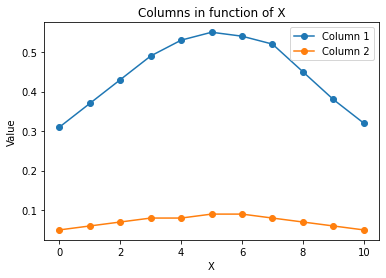

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Column values
column_values = [
    [0.31, 0.05],
    [0.37, 0.06],
    [0.43, 0.07],
    [0.49, 0.08],
    [0.53, 0.08],
    [0.55, 0.09],
    [0.54, 0.09],
    [0.52, 0.08],
    [0.45, 0.07],
    [0.38, 0.06],
    [0.32, 0.05]
]

# X values
x = np.arange(11)  # X values start at zero and go up to 10

# Create the plot for the first column
plt.plot(x, [row[0] for row in column_values], marker='o', label='Column 1')

# Create the plot for the second column
plt.plot(x, [row[1] for row in column_values], marker='o', label='Column 2')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Value')
plt.title('Columns in function of X')

# Add a legend
plt.legend()

# Show the plot
plt.show()


Total Dose 1: 0.8167168534152657 Gy
Total Dose 2: 0.00045696946064007697 Gy


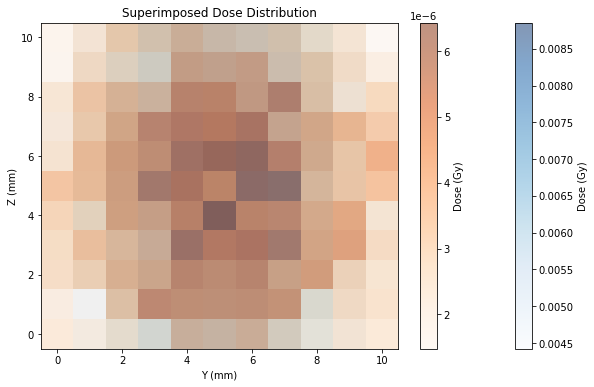

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the first dose file into a pandas DataFrame
df1 = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array1 = df1.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the X and Z coordinates of the first dose distribution
x1, z1 = np.meshgrid(df1['iY'].unique(), df1['iZ'].unique(), indexing='ij')

# Read the second dose file into a pandas DataFrame
df2 = pd.read_csv('Dose_iodine1.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array2 = df2.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the X and Z coordinates of the second dose distribution
x2, z2 = np.meshgrid(df2['iY'].unique(), df2['iZ'].unique(), indexing='ij')

# Plot the first dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Y (mm)')  # Set the X-axis label
ax.set_ylabel('Z (mm)')  # Set the Z-axis label
ax.set_title('Superimposed Dose Distribution')

im1 = ax.pcolormesh(x1, z1, dose_array1, cmap='Blues', alpha=0.5)
im2 = ax.pcolormesh(x2, z2, dose_array2, cmap='Oranges', alpha=0.5)

# Add colorbars for both dose distributions
cbar1 = fig.colorbar(im1, ax=ax, label='Dose (Gy)')
cbar2 = fig.colorbar(im2, ax=ax, label='Dose (Gy)')

# Calculate the total dose for each distribution
total_dose1 = np.sum(dose_array1)
total_dose2 = np.sum(dose_array2)

# Print the total doses
print("Total Dose 1: {} Gy".format(total_dose1))
print("Total Dose 2: {} Gy".format(total_dose2))

# Save the figure with a white background
plt.savefig('superimposed_dose.png', facecolor='white')

# Display the plot
plt.show()


Total Dose 1: 0.8167168534152657 Gy
Total Dose 2: 0.00045696946064007697 Gy


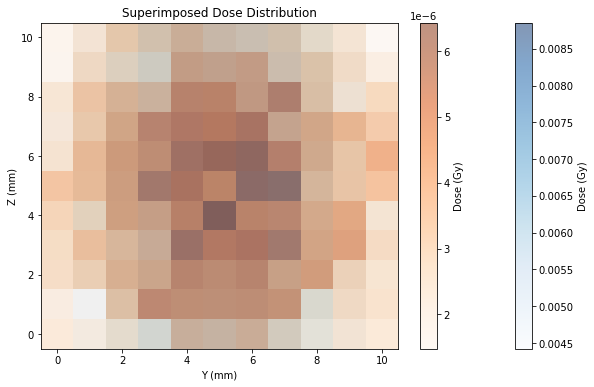

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the first dose file into a pandas DataFrame
df1 = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array1 = df1.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates of the first dose distribution
y1, z1 = np.meshgrid(df1['iY'].unique(), df1['iZ'].unique(), indexing='ij')

# Read the second dose file into a pandas DataFrame
df2 = pd.read_csv('Dose_iodine1.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array2 = df2.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates of the second dose distribution
y2, z2 = np.meshgrid(df2['iY'].unique(), df2['iZ'].unique(), indexing='ij')

# Plot the first dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Y (mm)')  # Set the Y-axis label
ax.set_ylabel('Z (mm)')  # Set the Z-axis label
ax.set_title('Superimposed Dose Distribution')

im1 = ax.pcolormesh(y1, z1, dose_array1, cmap='Blues', alpha=0.5)
im2 = ax.pcolormesh(y2, z2, dose_array2, cmap='Oranges', alpha=0.5)

# Add colorbars for both dose distributions
cbar1 = fig.colorbar(im1, ax=ax, label='Dose (Gy)')
cbar2 = fig.colorbar(im2, ax=ax, label='Dose (Gy)')

# Calculate the total dose for each distribution
total_dose1 = np.sum(dose_array1)
total_dose2 = np.sum(dose_array2)

# Print the total doses
print("Total Dose 1: {} Gy".format(total_dose1))
print("Total Dose 2: {} Gy".format(total_dose2))

# Save the figure with a white background
plt.savefig('superimposed_dose.png', facecolor='white')

# Display the plot
plt.show()


Total Dose 1: 0.8167168534152657 Gy
Total Dose 2: 0.00045696946064007697 Gy


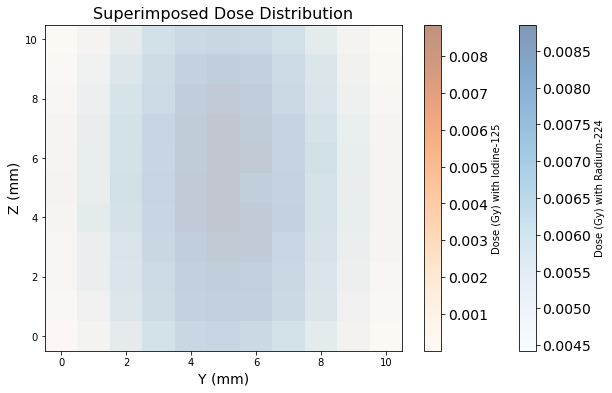

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the first dose file into a pandas DataFrame
df1 = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array1 = df1.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates of the first dose distribution
y1, z1 = np.meshgrid(df1['iY'].unique(), df1['iZ'].unique(), indexing='ij')

# Read the second dose file into a pandas DataFrame
df2 = pd.read_csv('Dose_iodine1.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array2 = df2.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates of the second dose distribution
y2, z2 = np.meshgrid(df2['iY'].unique(), df2['iZ'].unique(), indexing='ij')

# Determine the common maximum dose value for consistent scaling
max_dose = max(np.max(dose_array1), np.max(dose_array2))

# Plot the first dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Y (mm)',fontsize =14)  # Set the Y-axis label
ax.set_ylabel('Z (mm)',fontsize =14)  # Set the Z-axis label
ax.set_title('Superimposed Dose Distribution',fontsize =16)

im1 = ax.pcolormesh(y1, z1, dose_array1, cmap='Blues', alpha=0.5, vmax=max_dose)
im2 = ax.pcolormesh(y2, z2, dose_array2, cmap='Oranges', alpha=0.5, vmax=max_dose)

# Add colorbars for both dose distributions
#cbar1 = fig.colorbar(im1, ax=ax, label='Dose (Gy) with Radium-224', fontsize =14)
#cbar2 = fig.colorbar(im2, ax=ax, label='Dose (Gy) with Iodine-125',fontsize =14)
# Add colorbars for both dose distributions
cbar1 = fig.colorbar(im1, ax=ax, label='Dose (Gy) with Radium-224')
cbar1.ax.tick_params(labelsize=14)  # Manually set the font size for the colorbar

cbar2 = fig.colorbar(im2, ax=ax, label='Dose (Gy) with Iodine-125')
cbar2.ax.tick_params(labelsize=14)  # Manually set the font size for the colorbar

# Calculate the total dose for each distribution
total_dose1 = np.sum(dose_array1)
total_dose2 = np.sum(dose_array2)

# Print the total doses
print("Total Dose 1: {} Gy".format(total_dose1))
print("Total Dose 2: {} Gy".format(total_dose2))

# Save the figure with a white background
plt.savefig('superimposed_dose.png', facecolor='white')

# Display the plot
plt.show()


Dose at point (0, 0): 2.421011517676202e-06 Gy
Dose at point (0, 1): 2.196349210306234e-06 Gy
Dose at point (0, 2): 2.878946630026705e-06 Gy
Dose at point (0, 3): 2.900389458096136e-06 Gy
Dose at point (0, 4): 3.178387728813942e-06 Gy
Dose at point (0, 5): 3.710292512521517e-06 Gy
Dose at point (0, 6): 2.625941843422781e-06 Gy
Dose at point (0, 7): 2.378168067153221e-06 Gy
Dose at point (0, 8): 2.50549617920128e-06 Gy
Dose at point (0, 9): 1.734223353100934e-06 Gy
Dose at point (0, 10): 1.802035578187632e-06 Gy
Dose at point (1, 0): 2.339910570302444e-06 Gy
Dose at point (1, 1): 3.395843564264055e-06 Gy
Dose at point (1, 2): 2.454838988342089e-06 Gy
Dose at point (1, 3): 3.902856866744402e-06 Gy
Dose at point (1, 4): 3.402812934319937e-06 Gy
Dose at point (1, 5): 2.956906683932759e-06 Gy
Dose at point (1, 6): 3.968810761589516e-06 Gy
Dose at point (1, 7): 3.538358532200996e-06 Gy
Dose at point (1, 8): 3.403691264319907e-06 Gy
Dose at point (1, 9): 3.063279005534886e-06 Gy
Dose at point

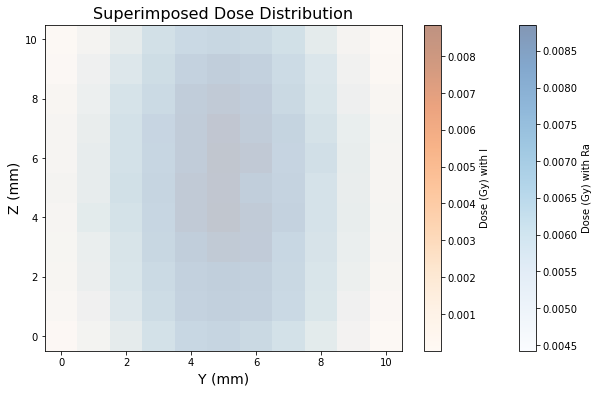

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the first dose file into a pandas DataFrame
df1 = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array1 = df1.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates of the first dose distribution
y1, z1 = np.meshgrid(df1['iY'].unique(), df1['iZ'].unique(), indexing='ij')

# Read the second dose file into a pandas DataFrame
df2 = pd.read_csv('Dose_iodine1.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array2 = df2.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates of the second dose distribution
y2, z2 = np.meshgrid(df2['iY'].unique(), df2['iZ'].unique(), indexing='ij')

# Determine the common maximum dose value for consistent scaling
max_dose = max(np.max(dose_array1), np.max(dose_array2))

# Plot the dose distributions using a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Y (mm)',fontsize =14)  # Set the Y-axis label
ax.set_ylabel('Z (mm)',fontsize =14)  # Set the Z-axis label
ax.set_title('Superimposed Dose Distribution',fontsize =16)

im1 = ax.pcolormesh(y1, z1, dose_array1, cmap='Blues', alpha=0.5, vmax=max_dose)
im2 = ax.pcolormesh(y2, z2, dose_array2, cmap='Oranges', alpha=0.5, vmax=max_dose)

# Add colorbars for both dose distributions
cbar1 = fig.colorbar(im1, ax=ax, label='Dose (Gy) with Ra')
cbar2 = fig.colorbar(im2, ax=ax, label='Dose (Gy) with I')

# Calculate the total dose for each distribution
total_dose1 = np.sum(dose_array1)
total_dose2 = np.sum(dose_array2)

# Calculate the dose deposited on the Y and Z axes
dose_y = dose_array1 + dose_array2
dose_z = np.sum(dose_array1, axis=0) + np.sum(dose_array2, axis=0)

# Calculate the total dose at each point
for i in range(len(y_labels)):
    for j in range(len(z_labels)):
        dose = dose_array[i, j]
        print("Dose at point ({}, {}): {} Gy".format(y_labels[i], z_labels[j], dose))

# Save the figure with a white background
#
plt.savefig('superimposed_dose.png', facecolor='white')


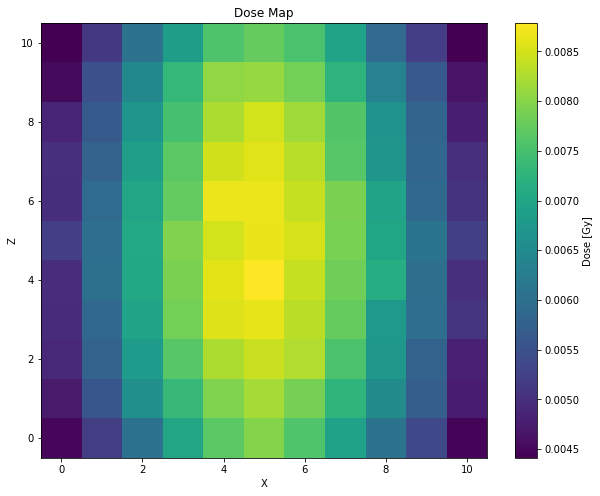

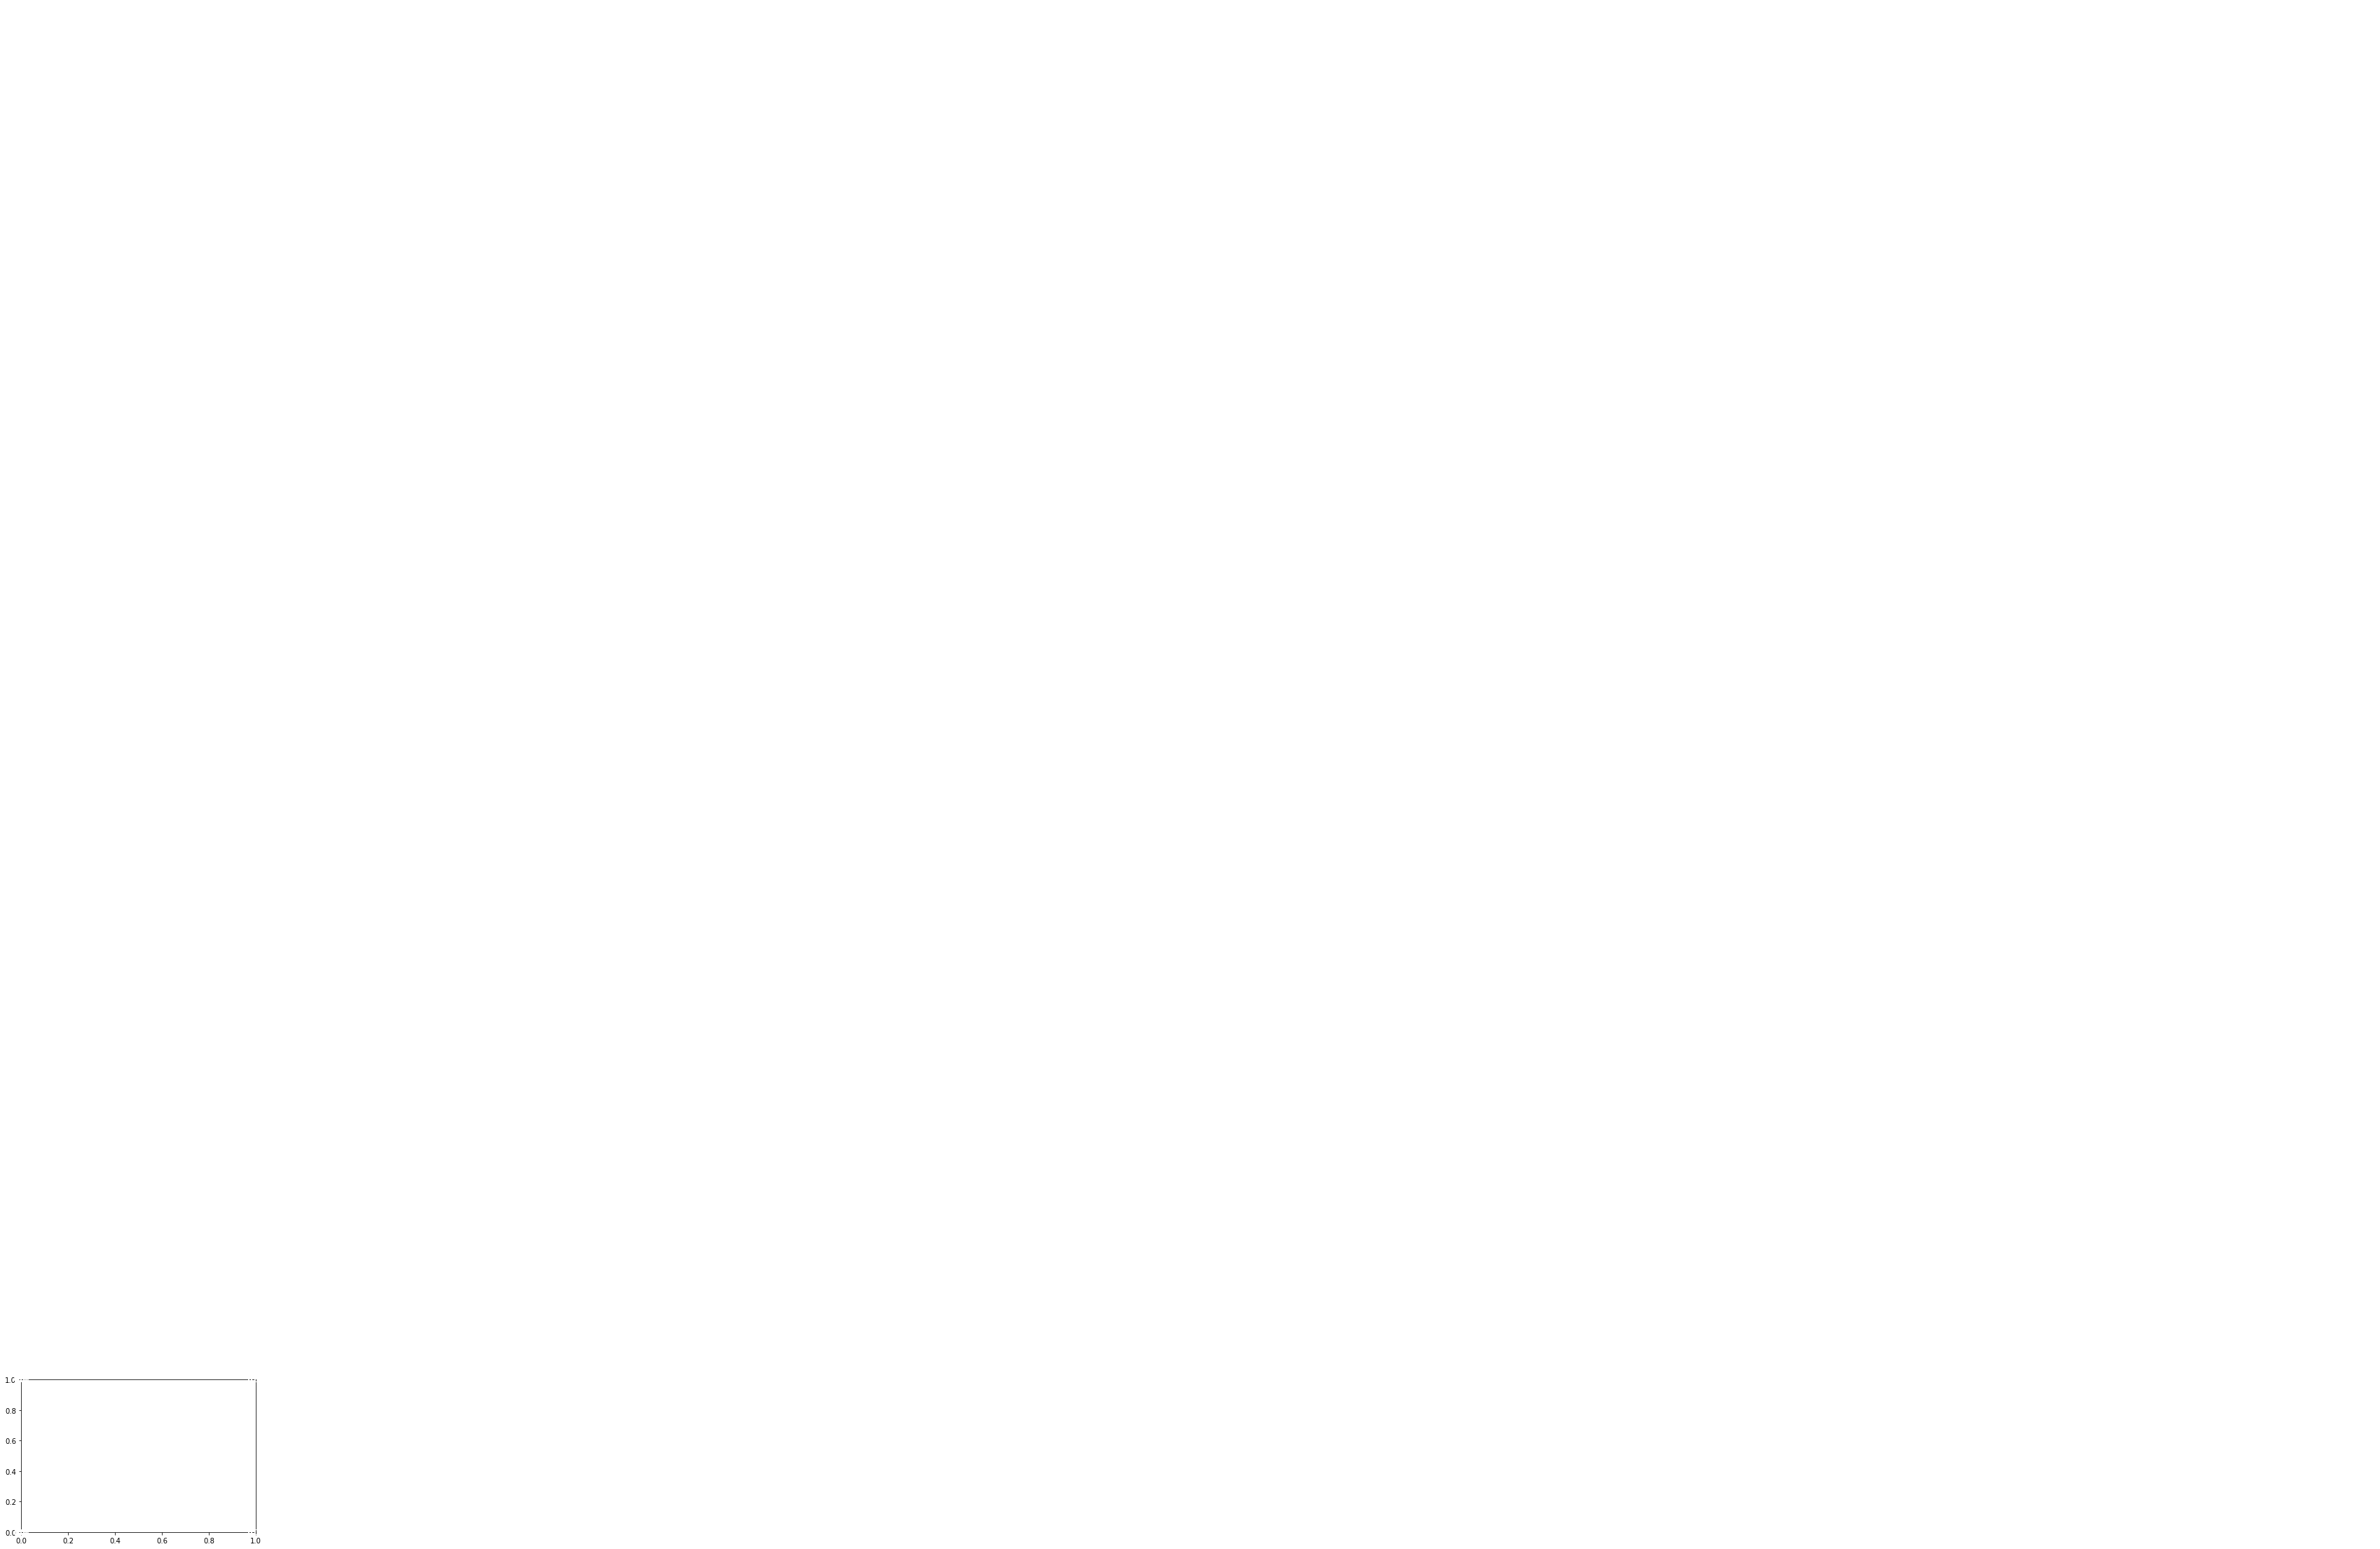

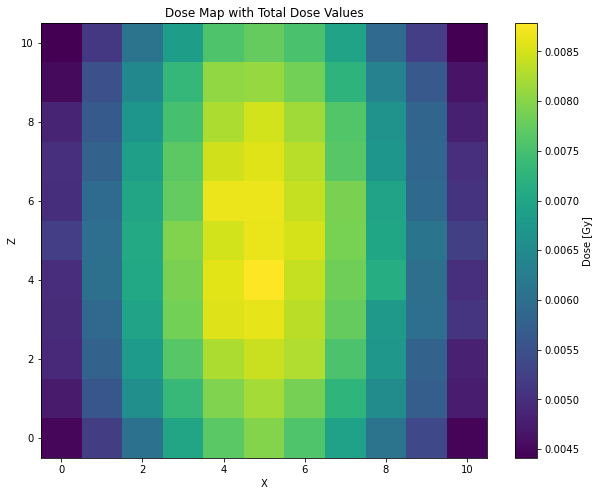

Total Dose Deposited on the X-axis:
X: 0, Total Dose: 0.82
X: 1, Total Dose: 1.05
X: 2, Total Dose: 1.38
X: 3, Total Dose: 6.08
X: 4, Total Dose: 220.22
X: 5, Total Dose: 11184.94
X: 6, Total Dose: 219.82
X: 7, Total Dose: 6.06
X: 8, Total Dose: 1.38
X: 9, Total Dose: 1.05
X: 10, Total Dose: 0.81

Total Dose Deposited on the Z-axis:
Z: 0, Total Dose: 1059.55
Z: 1, Total Dose: 1058.88
Z: 2, Total Dose: 1058.22
Z: 3, Total Dose: 1053.99
Z: 4, Total Dose: 1056.55
Z: 5, Total Dose: 1060.29
Z: 6, Total Dose: 1060.48
Z: 7, Total Dose: 1064.12
Z: 8, Total Dose: 1062.36
Z: 9, Total Dose: 1055.44
Z: 10, Total Dose: 1053.73


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iX', columns='iZ', aggfunc='first').values

# Create a meshgrid for the X and Z coordinates
x, z = np.meshgrid(df['iX'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose map
plt.figure(figsize=(10, 8))
plt.pcolormesh(x, z, dose_array, shading='auto')
plt.colorbar(label='Dose [Gy]')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Dose Map')
plt.show()

# Show the exact values of the total dose on the map
for i in range(len(df)):
    x_val = df.loc[i, 'iX']
    z_val = df.loc[i, 'iZ']
    dose_val = df.loc[i, 'Dose [Gy]']
    plt.text(x_val, z_val, f'{dose_val:.2f}', ha='center', va='center', color='white')

plt.figure(figsize=(10, 8))
plt.pcolormesh(x, z, dose_array, shading='auto')
plt.colorbar(label='Dose [Gy]')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Dose Map with Total Dose Values')
plt.show()

# Compute the total dose deposited at the X and Z axes
total_dose_x_axis = df.groupby('iX')['Dose [Gy]'].sum()
total_dose_z_axis = df.groupby('iZ')['Dose [Gy]'].sum()

x_axis_value = np.unique(df['iX'].values)
z_axis_value = np.unique(df['iZ'].values)

total_dose_x_values = total_dose_x_axis.values
total_dose_z_values = total_dose_z_axis.values

print("Total Dose Deposited on the X-axis:")
for x, dose in zip(x_axis_value, total_dose_x_values):
    print(f"X: {x}, Total Dose: {dose:.2f}")

print("\nTotal Dose Deposited on the Z-axis:")
for z, dose in zip(z_axis_value, total_dose_z_values):
    print(f"Z: {z}, Total Dose: {dose:.2f}")


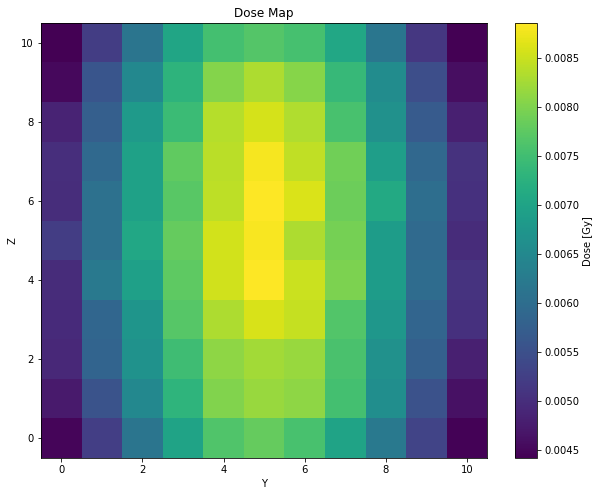

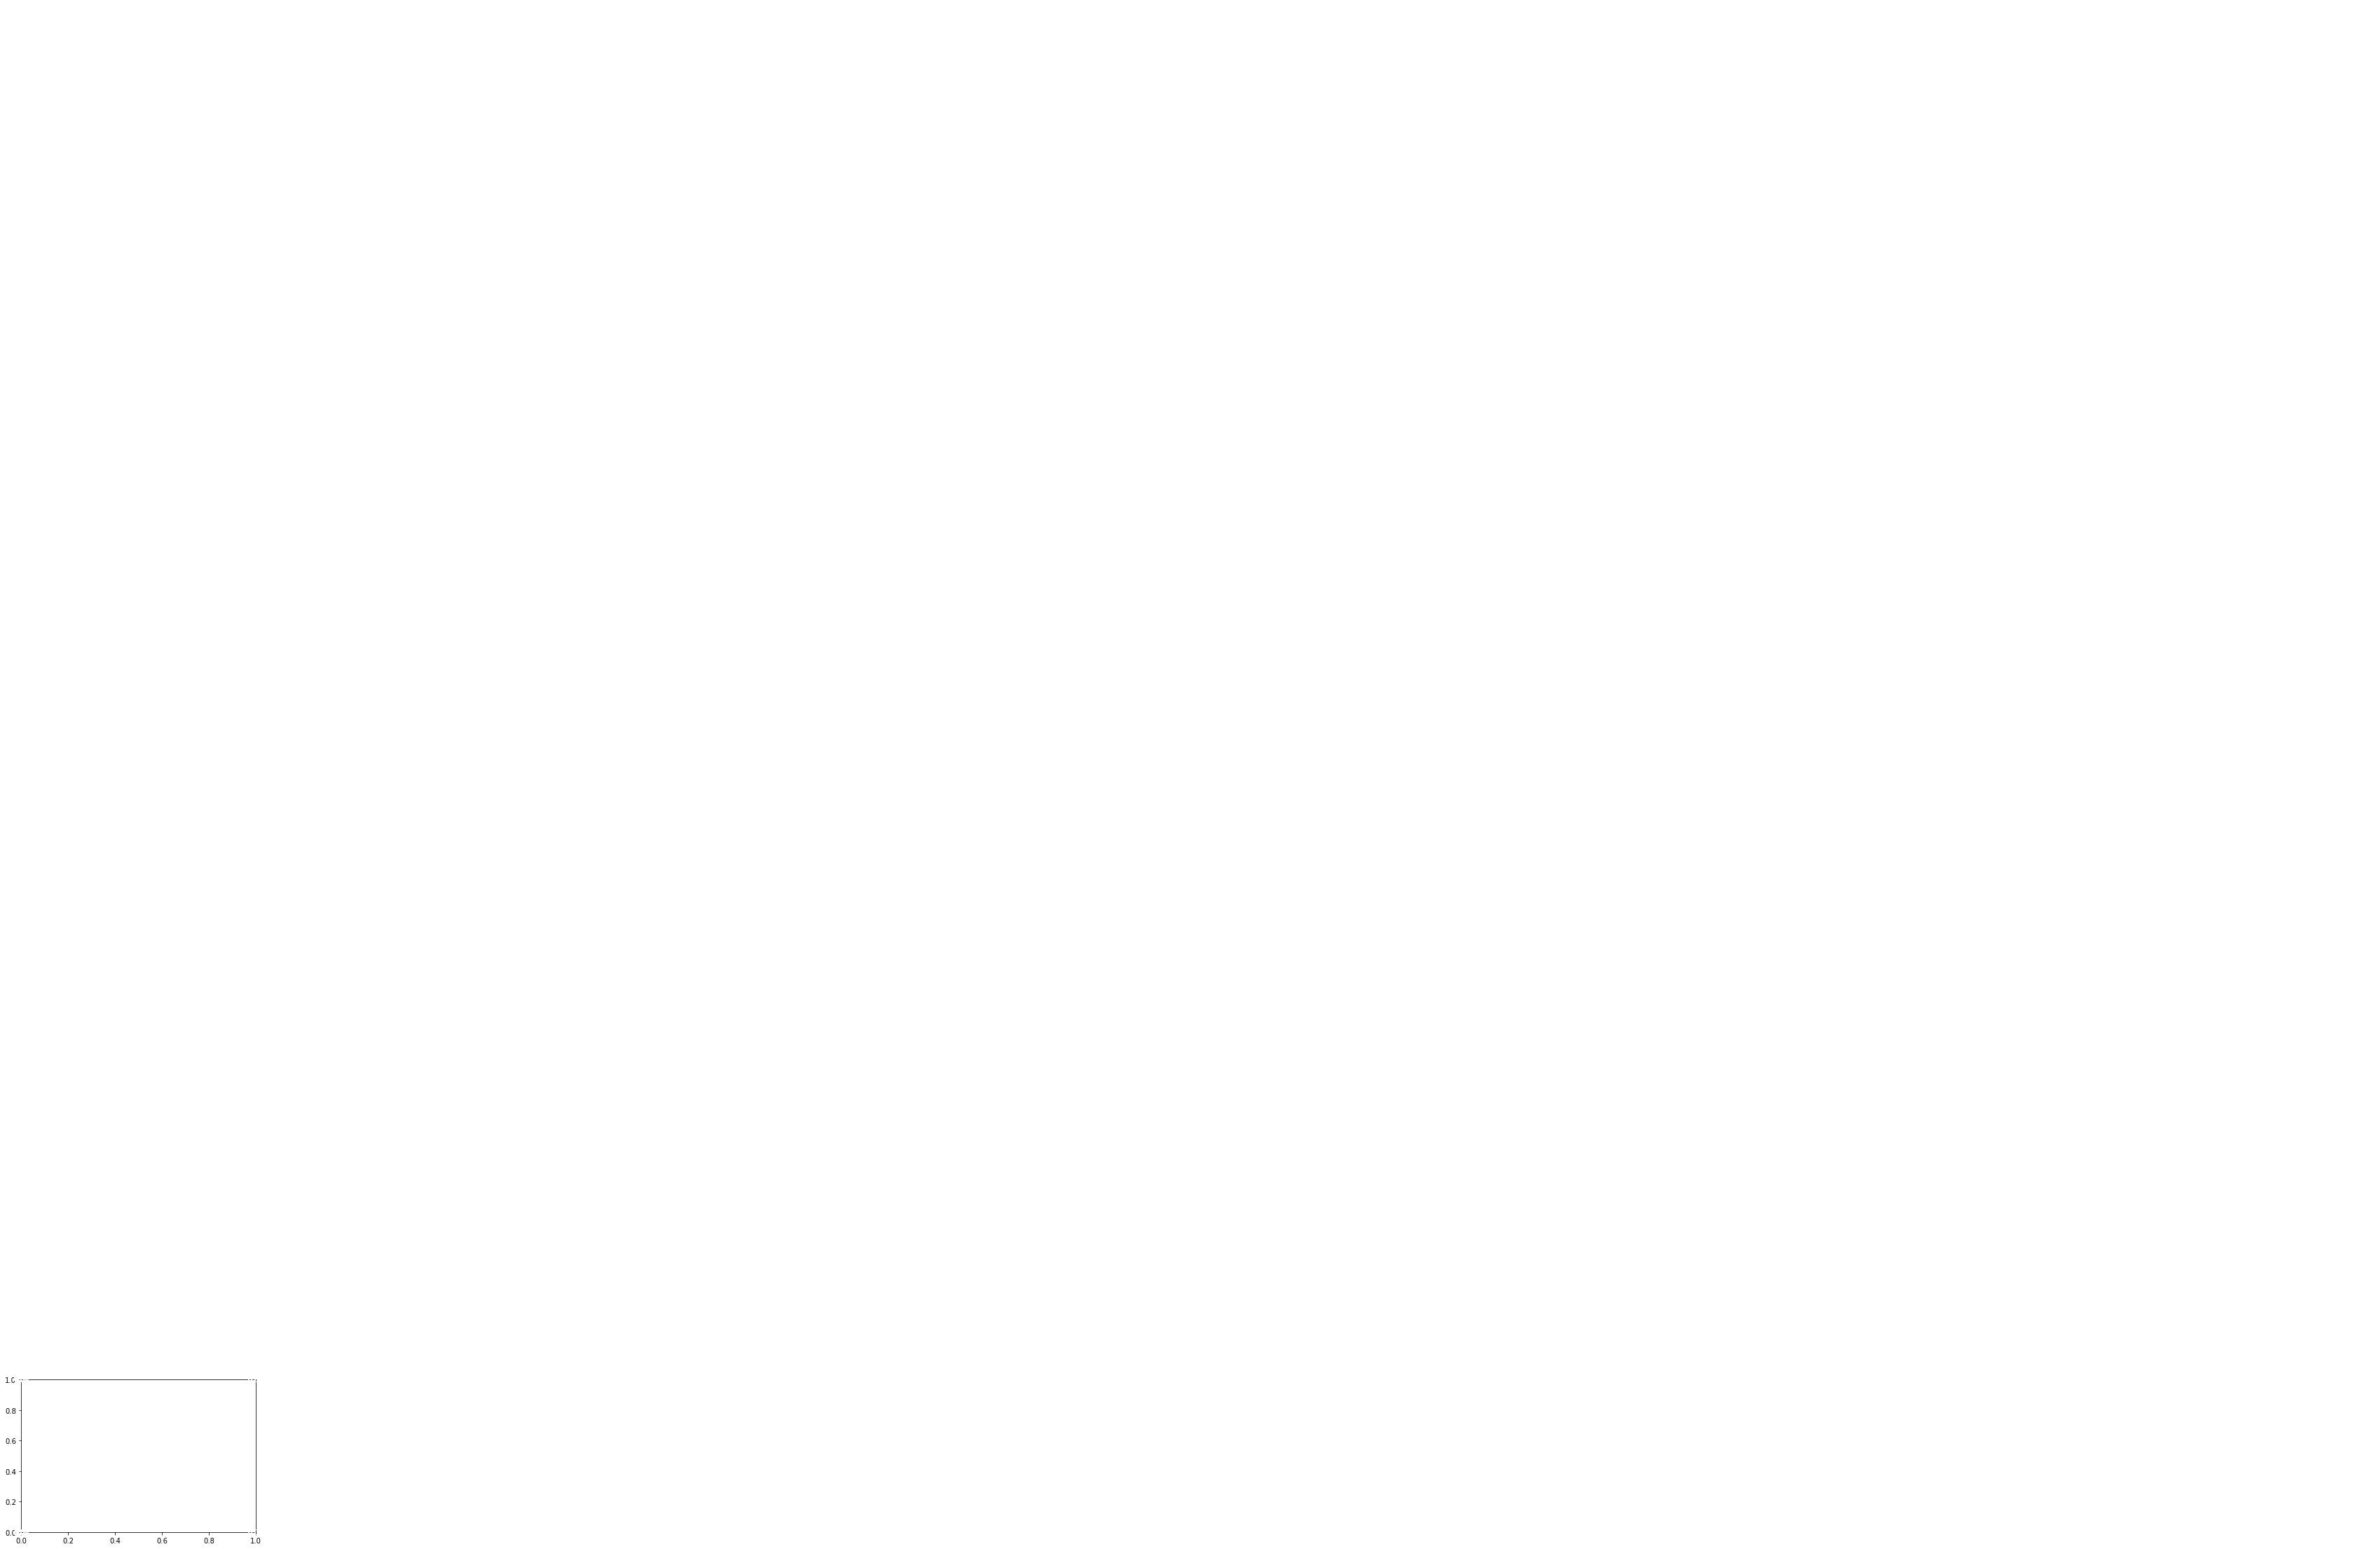

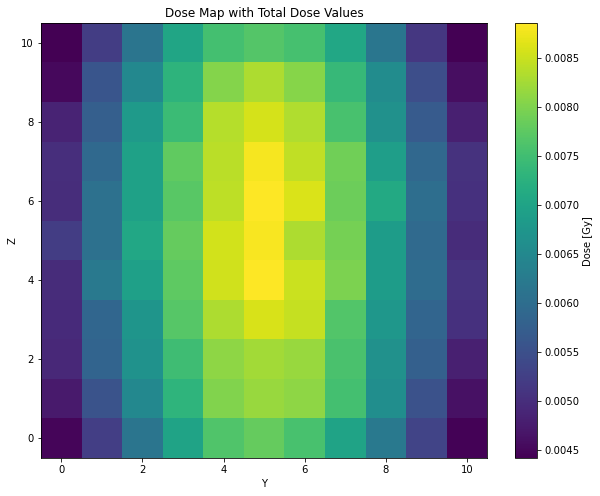

Total Dose Deposited on the Y-axis:
Y: 0, Total Dose: 0.82
Y: 1, Total Dose: 1.05
Y: 2, Total Dose: 1.38
Y: 3, Total Dose: 6.07
Y: 4, Total Dose: 220.22
Y: 5, Total Dose: 11184.79
Y: 6, Total Dose: 219.99
Y: 7, Total Dose: 6.04
Y: 8, Total Dose: 1.38
Y: 9, Total Dose: 1.05
Y: 10, Total Dose: 0.82

Total Dose Deposited on the Z-axis:
Z: 0, Total Dose: 1059.55
Z: 1, Total Dose: 1058.88
Z: 2, Total Dose: 1058.22
Z: 3, Total Dose: 1053.99
Z: 4, Total Dose: 1056.55
Z: 5, Total Dose: 1060.29
Z: 6, Total Dose: 1060.48
Z: 7, Total Dose: 1064.12
Z: 8, Total Dose: 1062.36
Z: 9, Total Dose: 1055.44
Z: 10, Total Dose: 1053.73


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the X and Z coordinates
y, z = np.meshgrid(df['iY'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose map
plt.figure(figsize=(10, 8))
plt.pcolormesh(y, z, dose_array, shading='auto')
plt.colorbar(label='Dose [Gy]')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Dose Map')
plt.show()

# Show the exact values of the total dose on the map
for i in range(len(df)):
    y_val = df.loc[i, 'iY']
    z_val = df.loc[i, 'iZ']
    dose_val = df.loc[i, 'Dose [Gy]']
    plt.text(y_val, z_val, f'{dose_val:.2f}', ha='center', va='center', color='white')

plt.figure(figsize=(10, 8))
plt.pcolormesh(y, z, dose_array, shading='auto')
plt.colorbar(label='Dose [Gy]')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Dose Map with Total Dose Values')
plt.show()

# Compute the total dose deposited at the X and Z axes
total_dose_y_axis = df.groupby('iY')['Dose [Gy]'].sum()
total_dose_z_axis = df.groupby('iZ')['Dose [Gy]'].sum()

y_axis_value = np.unique(df['iY'].values)
z_axis_value = np.unique(df['iZ'].values)

total_dose_y_values = total_dose_y_axis.values
total_dose_z_values = total_dose_z_axis.values

print("Total Dose Deposited on the Y-axis:")
for y, dose in zip(y_axis_value, total_dose_y_values):
    print(f"Y: {y}, Total Dose: {dose:.2f}")

print("\nTotal Dose Deposited on the Z-axis:")
for z, dose in zip(z_axis_value, total_dose_z_values):
    print(f"Z: {z}, Total Dose: {dose:.2f}")


Total Dose: 0.2081363244272405 Gy


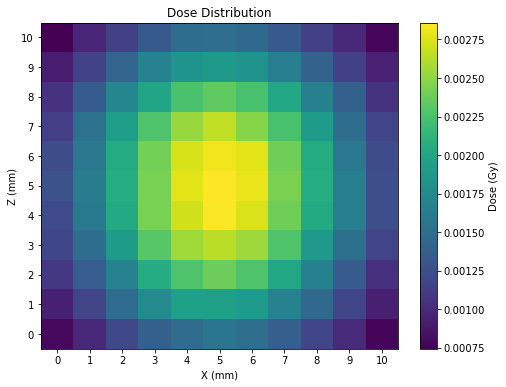

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium3.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iX', columns='iZ', aggfunc='first').values

# Create a meshgrid for the X and Z coordinates
x, z = np.meshgrid(df['iX'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('X (mm)')  # Set the X-axis label
ax.set_ylabel('Z (mm)')  # Set the Z-axis label
ax.set_title('Dose Distribution')

im = ax.pcolormesh(x, z, dose_array, cmap='viridis')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Dose (Gy)')  # Set the colorbar label

# Set the Z-axis labels
z_labels = df['iZ'].unique().astype(str)
ax.set_yticks(range(len(z_labels)))
ax.set_yticklabels(z_labels)

# Set the Y-axis labels
y_labels = df['iX'].unique().astype(str)
ax.set_xticks(range(len(y_labels)))
ax.set_xticklabels(y_labels)

# Calculate the total dose
total_dose = np.sum(dose_array)

# Print the result
print("Total Dose: {} Gy".format(total_dose))

# Save the figure with a white background
plt.savefig('dose_zX.png', facecolor='white')

# Display the plot
plt.show()


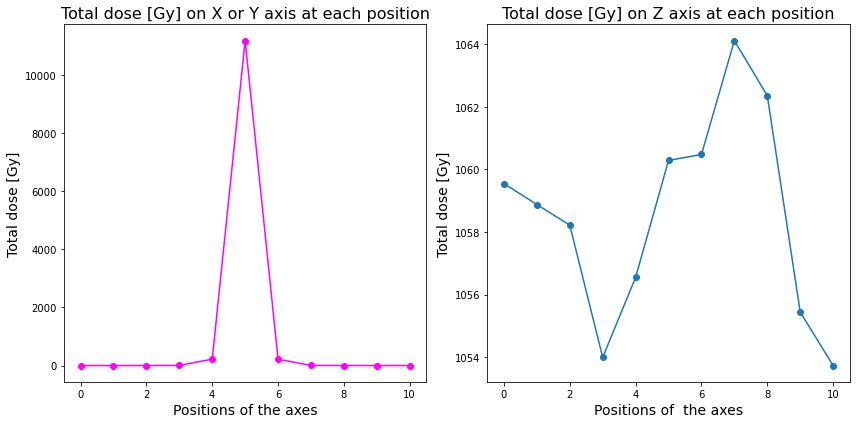

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the table data as a dictionary
data = {
    'Position of the axes': np.arange(11),
    'Total dose [Gy] on X or Y': [0.82, 1.05, 1.38, 6.08, 220.22, 11184.94, 219.82, 6.06, 1.38, 1.05, 0.81],
    'Total dose [Gy] on Z': [1059.55, 1058.88, 1058.22, 1053.99, 1056.55, 1060.29, 1060.48, 1064.12, 1062.36, 1055.44, 1053.73]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Create subplots for each column
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Dose on X or Y
axes[0].plot(df['Position of the axes'], df['Total dose [Gy] on X or Y'], marker='o', color='magenta')
axes[0].set_xlabel('Positions of the axes', fontsize= 14)
axes[0].set_ylabel('Total dose [Gy]', fontsize= 14)
axes[0].set_title('Total dose [Gy] on X or Y axis at each position', fontsize= 16)

# Plot Dose on Z
axes[1].plot(df['Position of the axes'], df['Total dose [Gy] on Z'], marker='o')
axes[1].set_xlabel('Positions of  the axes', fontsize= 14)
axes[1].set_ylabel('Total dose [Gy]', fontsize= 14)
axes[1].set_title('Total dose [Gy] on Z axis at each position', fontsize= 16)

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig('dose_postion_voxel.png', facecolor= "white")
# Show the plot
plt.show()


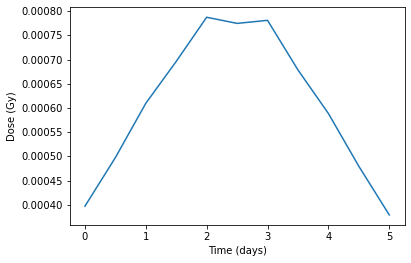

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_iodine.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iY', columns='iX', aggfunc='first').values

# Define the time axis
time_interval = 0.5 # in days
time_array = np.arange(dose_array.shape[0]) * time_interval

# Plot the dose as a function of time for one location
plt.plot(time_array, dose_array[:,0])
plt.xlabel('Time (days)')
plt.ylabel('Dose (Gy)')
#plt.savefig('dose_over_time.png')
plt.show()




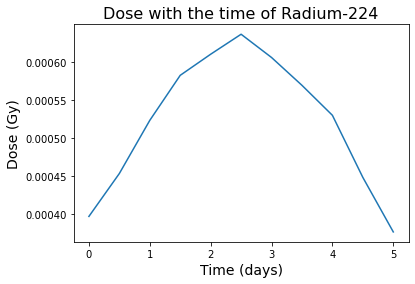

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_iodine.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iZ', columns='iY', aggfunc='first').values

# Define the time axis
time_interval = 0.5 # in days
time_array = np.arange(dose_array.shape[0]) * time_interval

# Plot the dose as a function of time for one location
plt.plot(time_array, dose_array[:,0])
plt.xlabel('Time (days)',fontsize= 14)
plt.ylabel('Dose (Gy)',fontsize= 14)
plt.title("Dose with the time of Radium-224", fontsize= 16)
plt.savefig('dosetime.png', facecolor= 'white')
plt.show()


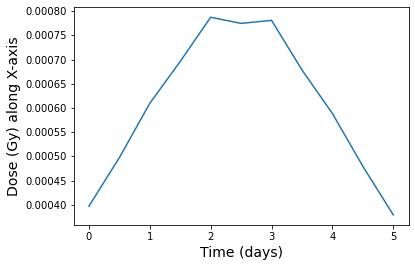

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_iodine.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iX', columns='iY', aggfunc='first').values

# Define the time axis
time_interval = 0.5 # in days
time_array = np.arange(dose_array.shape[0]) * time_interval

# Plot the dose as a function of time for one location
plt.plot(time_array, dose_array[0,:])
plt.xlabel('Time (days)',fontsize= 14)
plt.ylabel('Dose (Gy) along X-axis',fontsize= 14)
plt.show()


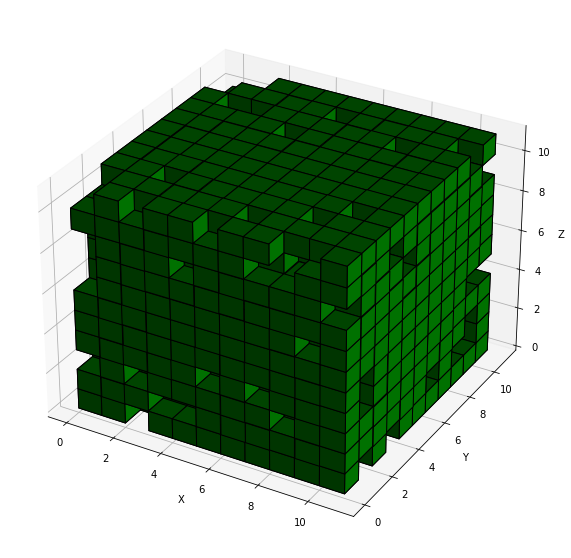

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
data_matrix = np.loadtxt("Dose_radium.txt", delimiter=",", skiprows=1)

# Define voxel dimensions and ROI radius
WidthOfXcoxel = WidthOfYcoxel = WidthOfZcoxel = 1.0 # cm
X_LowLimit = Y_LowLimit = Z_LowLimit = 0.0 # cm
ROI_Radius = 5.0 # cm

# Compute coordination matrix
Coordination_matrix = np.zeros((data_matrix.shape[0], 4))
Coordination_matrix[:, 0] = data_matrix[:, 0] * WidthOfXcoxel + X_LowLimit + (WidthOfXcoxel / 2)
Coordination_matrix[:, 1] = data_matrix[:, 1] * WidthOfYcoxel + Y_LowLimit + (WidthOfYcoxel / 2)
Coordination_matrix[:, 2] = data_matrix[:, 2] * WidthOfZcoxel + Z_LowLimit + (WidthOfZcoxel / 2)
Coordination_matrix[:, 3] = data_matrix[:, 3]

# Compute cumulative dose and dose outside ROI
total_dose = np.sum(Coordination_matrix[:, 3])
dose_of_outsideROI = 0.0
for i in range(data_matrix.shape[0]):
    if (Coordination_matrix[i, 0]**2 + Coordination_matrix[i, 1]**2 + Coordination_matrix[i, 2]**2) > ROI_Radius**2:
        dose_of_outsideROI += Coordination_matrix[i, 3]

percent_of_outside_dose = dose_of_outsideROI * 100.0 / total_dose

# Remove voxels with zero dose
Coordination_matrix_WithoutZeroDose = Coordination_matrix[Coordination_matrix[:, 3] != 0, :]

# Sum all the dose maps
total_dose_map = np.sum(Coordination_matrix[:, 3])

# Reshape the dose map to 3D
dose_map = Coordination_matrix[:, 3].reshape((int(data_matrix[:, 0].max()) + 1,
                                               int(data_matrix[:, 1].max()) + 1,
                                               int(data_matrix[:, 2].max()) + 1))

# Plot the dose map
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
X, Y, Z = np.meshgrid(np.arange(0, dose_map.shape[1]+1),
                      np.arange(0, dose_map.shape[0]+1),
                      np.arange(0, dose_map.shape[2]+1))
ax.voxels(X, Y, Z, dose_map, facecolors='green', edgecolor='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


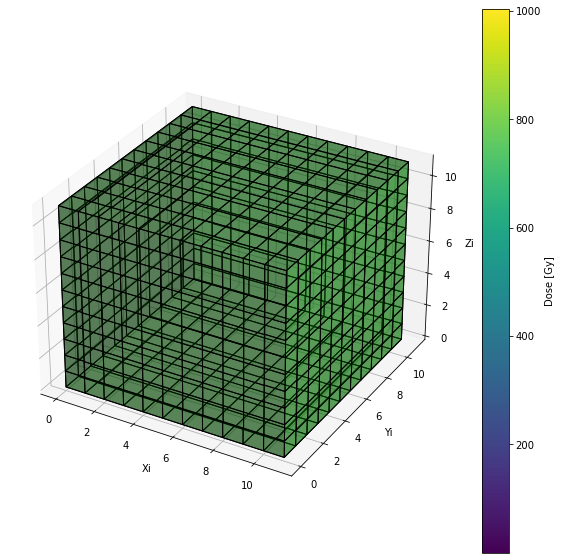

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
data_matrix = np.loadtxt("Dose_radium3111.txt", delimiter=",", skiprows=1)

# Define voxel dimensions and ROI radius
WidthOfXvoxel = WidthOfYvoxel = WidthOfZvoxel = 0.21  # cm
X_LowLimit = Y_LowLimit = Z_LowLimit = 0.0  # cm
ROI_Radius = 5.0  # cm

# Compute coordination matrix
Coordination_matrix = np.zeros((data_matrix.shape[0], 4))
Coordination_matrix[:, 0] = data_matrix[:, 0] * WidthOfXvoxel + X_LowLimit + (WidthOfXvoxel / 2)
Coordination_matrix[:, 1] = data_matrix[:, 1] * WidthOfYvoxel + Y_LowLimit + (WidthOfYvoxel / 2)
Coordination_matrix[:, 2] = data_matrix[:, 2] * WidthOfZvoxel + Z_LowLimit + (WidthOfZvoxel / 2)
Coordination_matrix[:, 3] = data_matrix[:, 3]

# Compute cumulative dose and dose outside ROI
total_dose = np.sum(Coordination_matrix[:, 3])
dose_of_outsideROI = 0.0
for i in range(data_matrix.shape[0]):
    if (Coordination_matrix[i, 0] ** 2 + Coordination_matrix[i, 1] ** 2 + Coordination_matrix[i, 2] ** 2) > ROI_Radius ** 2:
        dose_of_outsideROI += Coordination_matrix[i, 3]

percent_of_outside_dose = dose_of_outsideROI * 100.0 / total_dose

# Remove voxels with zero dose
Coordination_matrix_WithoutZeroDose = Coordination_matrix[Coordination_matrix[:, 3] != 0, :]

# Reshape the dose map to 3D
dose_map = Coordination_matrix[:, 3].reshape(
    (int(data_matrix[:, 0].max()) + 1, int(data_matrix[:, 1].max()) + 1, int(data_matrix[:, 2].max()) + 1)
)

# Plot the dose map
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
X, Y, Z = np.meshgrid(
    np.arange(0, dose_map.shape[1] + 1),
    np.arange(0, dose_map.shape[0] + 1),
    np.arange(0, dose_map.shape[2] + 1),
)
colors = np.log10(dose_map)  # Use logarithmic scale for colors
voxels = ax.voxels(
    X,
    Y,
    Z,
    dose_map,
    facecolors='green',
    edgecolor="k",
    alpha=0.4,
)  # Set alpha for transparency
ax.set_xlabel("Xi")
ax.set_ylabel("Yi")
ax.set_zlabel("Zi")
# Add color bar with positive values only
positive_values = dose_map[dose_map > 0]  # Extract positive values
min_value = np.min(positive_values)  # Find the minimum positive value
max_value = np.max(positive_values)  # Find the maximum positive value
norm = plt.Normalize(min_value, max_value)
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Dose [Gy]", orientation="vertical")

# Save and show the figure
plt.savefig("dose2", facecolor= "white")


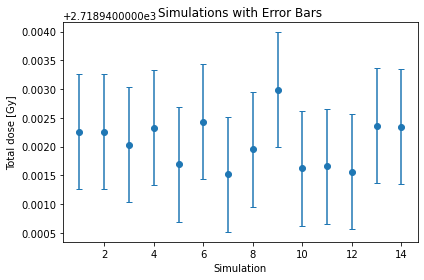

In [1]:
import matplotlib.pyplot as plt

# Simulation data
simulations = [
    2718.942258451331, 2718.9422584987306, 2718.942034678487,
    2718.9423318094114, 2718.9416965117566, 2718.9424289905423,
    2718.9415175740155, 2718.9419513242233, 2718.9429878690207,
    2718.9416197194096, 2718.9416596136593, 2718.941563211438,
    2718.942367444919, 2718.9423493319837
]

# Error value
error = 0.001

# Generate x-axis values
x = range(1, len(simulations) + 1)

# Plot simulations with error bars
plt.errorbar(x, simulations, yerr=error, fmt='o', capsize=3)

# Set plot title and labels
plt.title('Simulations with Error Bars')
plt.xlabel('Simulation')
plt.ylabel('Total dose [Gy]')

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()


Mean of Dose: 2.0427813934474006
Standard deviation of Dose: 22.63617003465428
Variance of Dose: 0.9992486851990983


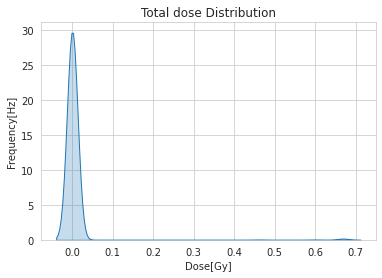

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the dose data into a pandas DataFrame
df = pd.read_csv('Dose_radium32.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Calculate the mean and standard deviation of Dose
mean_dose = df['Dose [Gy]'].mean()
std_dose = df['Dose [Gy]'].std()
print("Mean of Dose: {}".format(mean_dose))
print("Standard deviation of Dose: {}".format(std_dose))

# Normalize the Dose distribution
df['Dose [Gy]'] = (df['Dose [Gy]'] - mean_dose) / std_dose

# Calculate the variance of the normalized Dose distribution
var_dose = np.var(df['Dose [Gy]'])
print("Variance of Dose: {}".format(var_dose))

# Set the style to white background and grid lines
sns.set_style("whitegrid")

# Create a KDE plot of the Total value distribution
sns.kdeplot(df['Total(val^2)'], fill=True)
plt.xlabel('Dose[Gy]')
plt.ylabel('Frequency[Hz]')
plt.title('Total dose Distribution')
plt.savefig("dose_frequence_radium.png")
plt.show()

# Test the normality of the Total value distribution using the Shapiro-Wilk test
#stat, p = stats.shapiro(df['Total(val^2)']) 
#print("Shapiro-Wilk test p-value: {}".format(p))
#if p > 0.05:


Mean of Dose: 2.0427813934474006
Standard deviation of Dose: 22.63617003465428


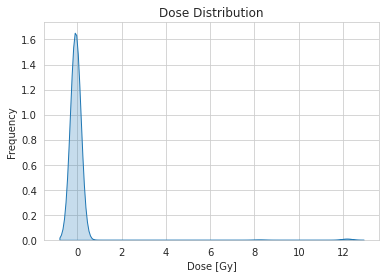

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the dose data into a pandas DataFrame
df = pd.read_csv('Dose_radium32.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Calculate the mean and standard deviation of Dose
mean_dose = df['Dose [Gy]'].mean()
std_dose = df['Dose [Gy]'].std()
print("Mean of Dose: {}".format(mean_dose))
print("Standard deviation of Dose: {}".format(std_dose))

# Normalize the Dose distribution
df['Dose [Gy]'] = (df['Dose [Gy]'] - mean_dose) / std_dose

# Set the style to white background and grid lines
sns.set_style("whitegrid")

# Create a KDE plot of the Dose distribution
sns.kdeplot(df['Dose [Gy]'], fill=True)
plt.xlabel('Dose [Gy]')
plt.ylabel('Frequency')
plt.title('Dose Distribution')
plt.savefig("dose_distribution_radium.png")
plt.show()


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the dose data into a pandas DataFrame
df = pd.read_csv('Dose_radium314.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Calculate the total dose
total_dose = df['Dose [Gy]'].sum()

# Print the total dose
print("Total Dose: {}".format(total_dose))


Total Dose: 2718.9423493319837


In [88]:
import statistics

# Total dose values
total_dose_values = [2718.942258451331, 2718.9422584987306, 2718.942034678487, 2718.9423318094114, 2718.9416965117566, 2718.9424289905423, 2718.9415175740155, 2718.9419513242233, 2718.9429878690207, 2718.9416197194096, 2718.9416596136593, 2718.941563211438, 2718.942367444919, 2718.9423493319837]

# Calculate the mean of the total dose
mean_total_dose = statistics.mean(total_dose_values)

# Print the mean of the total dose
print("Mean of Total Dose: {}".format(mean_total_dose))

# Calculate the standard deviation of the total dose
std_total_dose = statistics.stdev(total_dose_values)

# Print the standard deviation of the total dose
print("Standard Deviation of Total Dose: {}".format(std_total_dose))

# Calculate the relative uncertainty
relative_uncertainty = (std_total_dose / mean_total_dose) * 100

# Print the relative uncertainty
print("Relative Uncertainty: {}%".format(relative_uncertainty))


Mean of Total Dose: 2718.942073216352
Standard Deviation of Total Dose: 0.0004265520340880914
Relative Uncertainty: 1.5688161888035552e-05%


In [83]:
import statistics

# Total dose values
total_dose_values = [2718.942258451331, 2718.9422584987306, 2718.942034678487, 2718.9423318094114, 2718.9416965117566, 2718.9424289905423, 2718.9415175740155, 2718.9419513242233, 2718.9429878690207, 2718.9416197194096, 2718.9416596136593, 2718.941563211438, 2718.942367444919, 2718.9423493319837]

# Calculate the standard deviation of the total dose
std_total_dose = statistics.stdev(total_dose_values)

# Print the standard deviation of the total dose
print("Standard Deviation of Total Dose: {}".format(std_total_dose))


Standard Deviation of Total Dose: 0.0004265520340880914


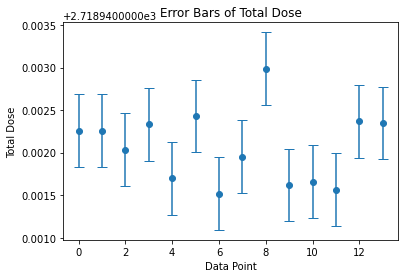

In [85]:
import matplotlib.pyplot as plt
import statistics

# Total dose values
total_dose_values = [2718.942258451331, 2718.9422584987306, 2718.942034678487, 2718.9423318094114, 2718.9416965117566, 2718.9424289905423, 2718.9415175740155, 2718.9419513242233, 2718.9429878690207, 2718.9416197194096, 2718.9416596136593, 2718.941563211438, 2718.942367444919, 2718.9423493319837]

# Calculate the mean of the total dose
mean_total_dose = statistics.mean(total_dose_values)

# Calculate the standard deviation of the total dose
std_total_dose = statistics.stdev(total_dose_values)

# Plotting the error bars
fig, ax = plt.subplots()
ax.errorbar(range(len(total_dose_values)), total_dose_values, yerr=std_total_dose, fmt='o', capsize=5)

# Set labels and title
ax.set_xlabel('Data Point')
ax.set_ylabel('Total Dose')
ax.set_title('Error Bars of Total Dose')

# Show the plot
plt.show()


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the dose data into a pandas DataFrame
df = pd.read_csv('Dose_radium31.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Calculate the mean and standard deviation of Dose
mean_dose = df['Dose [Gy]'].mean()
std_dose = df['Dose [Gy]'].std()
print("Mean of Dose: {}".format(mean_dose))
print("Standard deviation of Dose: {}".format(std_dose))


Mean of Dose: 2.04278156160686
Standard deviation of Dose: 22.636171486232563


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
# Read the dose data into a pandas DataFrame
df = pd.read_csv('Dose_radium3.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Calculate the mean and standard deviation of Dose
mean_dose = df['Dose [Gy]'].mean()
std_dose = df['Dose [Gy]'].std()
print("Mean of Dose: {}".format(mean_dose))
print("Standard deviation of Dose: {}".format(std_dose))


Mean of Dose: 2.04278156157125
Standard deviation of Dose: 22.636171487786765


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
# Read the dose data into a pandas DataFrame
df = pd.read_csv('Dose_radium33.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Calculate the mean and standard deviation of Dose
mean_dose = df['Dose [Gy]'].mean()
std_dose = df['Dose [Gy]'].std()
print("Mean of Dose: {}".format(mean_dose))
print("Standard deviation of Dose: {}".format(std_dose))


Mean of Dose: 2.042781616686259
Standard deviation of Dose: 22.636172770715426


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
# Read the dose data into a pandas DataFrame
df = pd.read_csv('Dose_radium32.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Calculate the mean and standard deviation of Dose
mean_dose = df['Dose [Gy]'].mean()
std_dose = df['Dose [Gy]'].std()
print("Mean of Dose: {}".format(mean_dose))
print("Standard deviation of Dose: {}".format(std_dose))


Mean of Dose: 2.0427813934474006
Standard deviation of Dose: 22.63617003465428


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
# Read the dose data into a pandas DataFrame
df = pd.read_csv('Dose_radium34.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Calculate the mean and standard deviation of Dose
mean_dose = df['Dose [Gy]'].mean()
std_dose = df['Dose [Gy]'].std()
print("Mean of Dose: {}".format(mean_dose))
print("Standard deviation of Dose: {}".format(std_dose))


Mean of Dose: 2.04278113937773
Standard deviation of Dose: 22.636167098450287


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
# Read the dose data into a pandas DataFrame
df = pd.read_csv('Dose_radium35.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Calculate the mean and standard deviation of Dose
mean_dose = df['Dose [Gy]'].mean()
std_dose = df['Dose [Gy]'].std()
print("Mean of Dose: {}".format(mean_dose))
print("Standard deviation of Dose: {}".format(std_dose))


Mean of Dose: 2.042781689699883
Standard deviation of Dose: 22.63617425567849


In [61]:
min_dose=df['Dose [Gy]'].min()
min_dose

max_dose=df['Dose [Gy]'].max()
max_dose


278.7138344493336

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
# Read the dose data into a pandas DataFrame
df = pd.read_csv('Dose_radium311.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Calculate the mean and standard deviation of Dose
mean_dose = df['Dose [Gy]'].mean()
std_dose = df['Dose [Gy]'].std()
print("Mean of Dose: {}".format(mean_dose))
print("Standard deviation of Dose: {}".format(std_dose))


Mean of Dose: 2.0427811116556396
Standard deviation of Dose: 22.636167253072195


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
# Read the dose data into a pandas DataFrame
df = pd.read_csv('Dose_radium312.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Calculate the mean and standard deviation of Dose
mean_dose = df['Dose [Gy]'].mean()
std_dose = df['Dose [Gy]'].std()
print("Mean of Dose: {}".format(mean_dose))
print("Standard deviation of Dose: {}".format(std_dose))


Mean of Dose: 2.0427810392272234
Standard deviation of Dose: 22.636165125603714


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
# Read the dose data into a pandas DataFrame
df = pd.read_csv('Dose_radium313&.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Calculate the mean and standard deviation of Dose
mean_dose = df['Dose [Gy]'].mean()
std_dose = df['Dose [Gy]'].std()
print("Mean of Dose: {}".format(mean_dose))
print("Standard deviation of Dose: {}".format(std_dose))


Mean of Dose: 2.0427816434597426
Standard deviation of Dose: 22.636173548319423


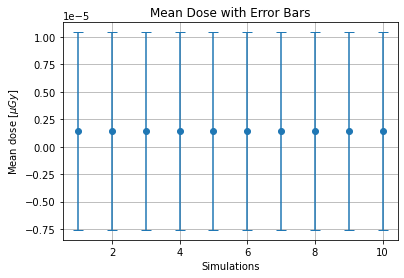

In [13]:
import matplotlib.pyplot as plt
import numpy as np

simulations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mean_dose = [1.4253873663874918e-06, 1.4253796688595145e-06, 1.425390306526991e-06, 1.425383191749407e-06, 1.425386513817952e-06, 1.425380837197657e-06, 1.4253788906552005e-06, 1.4253789202775222e-06, 1.4253788906552005e-06, 1.4253908478173534e-06]
std_dev = [9.004033367336843e-06, 9.004029534362807e-06, 9.004113943604852e-06, 9.004038767982743e-06, 9.004052857322442e-06, 9.004034700047127e-06, 9.004003354112968e-06, 9.00397809647269e-06, 9.004003354112968e-06, 9.004051090593697e-06]

# Plot error bars
plt.errorbar(simulations, mean_dose, yerr=std_dev, fmt='o', capsize=5)
plt.xlabel('Simulations')
plt.ylabel('Mean dose [$\mu Gy$]')
plt.title('Mean Dose with Error Bars')
plt.grid(True)
plt.savefig("error11.png", facecolor='white')
plt.show()


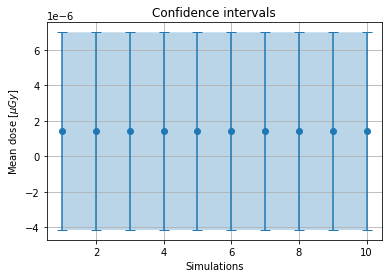

In [17]:
import matplotlib.pyplot as plt
import numpy as np

simulations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mean_dose = [1.4253873663874918e-06, 1.4253796688595145e-06, 1.425390306526991e-06, 1.425383191749407e-06, 1.425386513817952e-06, 1.425380837197657e-06, 1.4253788906552005e-06, 1.4253789202775222e-06, 1.4253788906552005e-06, 1.4253908478173534e-06]
std_dev = [9.004033367336843e-06, 9.004029534362807e-06, 9.004113943604852e-06, 9.004038767982743e-06, 9.004052857322442e-06, 9.004034700047127e-06, 9.004003354112968e-06, 9.00397809647269e-06, 9.004003354112968e-06, 9.004051090593697e-06]

# Calculate confidence interval
n = len(simulations)
confidence = 1.96 * np.array(std_dev) / np.sqrt(n)
lower_bound = np.array(mean_dose) - confidence
upper_bound = np.array(mean_dose) + confidence

# Plot error bars
plt.errorbar(simulations, mean_dose, yerr=confidence, fmt='o', capsize=5)
plt.fill_between(simulations, lower_bound, upper_bound, alpha=0.3)
plt.xlabel('Simulations')
plt.ylabel('Mean dose [$\mu Gy$]')
plt.title('Confidence intervals')
plt.grid(True)
plt.savefig("error12.png", facecolor='white')
plt.show()


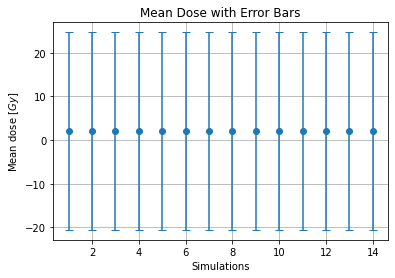

In [45]:
import matplotlib.pyplot as plt

simulations = range(1, 15)
mean_dose = [2.04278156160686, 2.04278156157125, 2.042781616686259, 2.0427813934474006, 2.04278113937773,
             2.042781689699883, 2.042782109593553, 2.042781004939152, 2.0427810816824996, 2.042781330822105,
             2.0427816298512256, 2.0427816434597426, 2.0427810392272234, 2.0427811116556396]
std_dev = [22.636171486232563, 22.636171487786765, 22.636172770715426, 22.63617003465428, 22.636167098450287,
           22.63617425567849, 22.63617640755768, 22.636165841351193, 22.636168149826382, 22.63616767455137,
           22.636171770801397, 22.636173548319423, 22.636165125603714, 22.636167253072195]

# Plotting the error bars
plt.errorbar(simulations, mean_dose, yerr=std_dev, fmt='o', capsize=4)

plt.xlabel('Simulations')
plt.ylabel('Mean dose [$Gy$]')
plt.title('Mean Dose with Error Bars')
plt.grid(True)

plt.savefig("error211.png", facecolor='white', bbox_inches='tight')
plt.show()


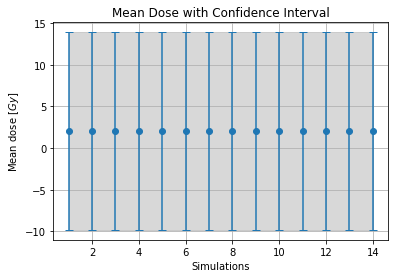

In [46]:
import matplotlib.pyplot as plt
import numpy as np

simulations = range(1, 15)
mean_dose = [2.04278156160686, 2.04278156157125, 2.042781616686259, 2.0427813934474006, 2.04278113937773,
             2.042781689699883, 2.042782109593553, 2.042781004939152, 2.0427810816824996, 2.042781330822105,
             2.0427816298512256, 2.0427816434597426, 2.0427810392272234, 2.0427811116556396]
std_dev = [22.636171486232563, 22.636171487786765, 22.636172770715426, 22.63617003465428, 22.636167098450287,
           22.63617425567849, 22.63617640755768, 22.636165841351193, 22.636168149826382, 22.63616767455137,
           22.636171770801397, 22.636173548319423, 22.636165125603714, 22.636167253072195]

# Calculate the upper and lower bounds of the confidence interval
confidence_interval = 1.96 * (np.array(std_dev) / np.sqrt(len(simulations)))

# Plotting the confidence interval
plt.errorbar(simulations, mean_dose, yerr=confidence_interval, fmt='o', capsize=4)

# Calculate the x-values for shading the confidence interval
x = np.array(simulations)
lower_bound = np.array(mean_dose) - confidence_interval
upper_bound = np.array(mean_dose) + confidence_interval

# Shade the confidence interval
plt.fill_between(x, lower_bound, upper_bound, color='gray', alpha=0.3)

plt.xlabel('Simulations')
plt.ylabel('Mean dose [$Gy$]')
plt.title('Mean Dose with Confidence Interval')
plt.grid(True)
plt.savefig("error21.png", facecolor='white',bbox_inches='tight')
plt.show()


Dose for X = 0: 0.06882278263058791 Gy
Dose for X = 1: 0.08990262393195068 Gy
Dose for X = 2: 0.1197534049805396 Gy
Dose for X = 3: 0.5566602022541617 Gy
Dose for X = 4: 20.044642546431973 Gy
Dose for X = 5: 1017.8650651094061 Gy
Dose for X = 6: 19.98081278418018 Gy
Dose for X = 7: 0.5505343952009533 Gy
Dose for X = 8: 0.119616353648873 Gy
Dose for X = 9: 0.0893258673079317 Gy
Dose for X = 10: 0.0684909375289377 Gy
Total Dose: 1059.5536270075022 Gy


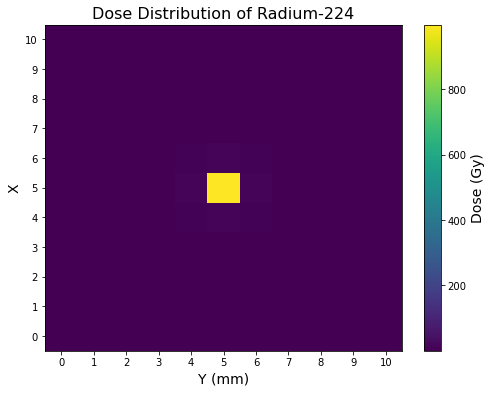

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iY', columns='iX', aggfunc='first').values

# Create a meshgrid for the Y and X coordinates
y, x = np.meshgrid(df['iY'].unique(), df['iX'].unique(), indexing='ij')

# Plot the dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Y (mm)', fontsize=14)  # Set the X-axis label
ax.set_ylabel('X', fontsize=14)  # Set the X-axis label
ax.set_title('Dose Distribution of Radium-224', fontsize=16)

im = ax.pcolormesh(y, x, dose_array, cmap='viridis')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Dose (Gy)', fontsize=14)  # Set the colorbar label

# Set the X-axis labels
x_labels = df['iX'].unique().astype(str)
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)

# Set the Y-axis labels
y_labels = df['iY'].unique().astype(str)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)

# Calculate the sum of dose at each point
for i in range(len(x_labels)):
    dose_sum = np.nansum(dose_array[:, i])  # Sum of dose for a fixed X over all values of Y
    print("Dose for X = {}: {} Gy".format(x_labels[i], dose_sum))

# Calculate the total dose
total_dose = np.nansum(dose_array)

# Print the total dose
print("Total Dose: {} Gy".format(total_dose))

# Save the figure with a white background
plt.savefig('dose_yx_Ra.png', facecolor='white')

# Display the plot
plt.show()


Dose for Y = 0: 0.06876179914993909 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 1: 0.08984107790942669 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 2: 0.11973606104174297 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 3: 0.5504080459914924 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 4: 20.011474581798407 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 5: 1017.8561841093929 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 6: 20.031670598455747 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 7: 0.5488353155952566 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 8: 0.11952791911129691 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 9: 0.08897377882261359 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 10: 0.0682137202334076 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Total Dose: 1059.5536270075022 Gy


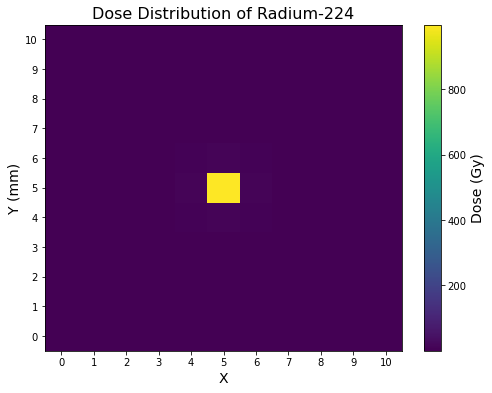

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iY', columns='iX', aggfunc='first').values

# Create a meshgrid for the Y and X coordinates
y, x = np.meshgrid(df['iY'].unique(), df['iX'].unique(), indexing='ij')

# Plot the dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('X', fontsize=14)  # Set the X-axis label
ax.set_ylabel('Y (mm)', fontsize=14)  # Set the Y-axis label
ax.set_title('Dose Distribution of Radium-224', fontsize=16)

im = ax.pcolormesh(x, y, dose_array, cmap='viridis')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Dose (Gy)', fontsize=14)  # Set the colorbar label

# Set the X-axis labels
x_labels = df['iX'].unique().astype(str)
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)

# Set the Y-axis labels
y_labels = df['iY'].unique().astype(str)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)

# Calculate the sum of dose at each point
for j in range(len(y_labels)):
    dose_sum = np.nansum(dose_array[j, :])  # Sum of dose for a fixed Y over all values of X
    x_indices = np.where(~np.isnan(dose_array[j, :]))[0]
    x_values = x_labels[x_indices]
    print("Dose for Y = {}: {} Gy (X values: {})".format(y_labels[j], dose_sum, ", ".join(x_values)))

# Calculate the total dose
total_dose = np.nansum(dose_array)

# Print the total dose
print("Total Dose: {} Gy".format(total_dose))

# Save the figure with a white background
plt.savefig('dose_xy_Ra.png', facecolor='white')

# Display the plot
plt.show()
